# EDA

In [1]:
pip install --upgrade pip

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn 

In [4]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install --upgrade --force-reinstall pillow

#### IMPORT DES DONNEES

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
data = pd.read_csv("../SBAnational.csv", low_memory=False)
# data = data.drop(['ChgOffDate', 'DisbursementDate', 'DisbursementGross','BalanceGross', 'ChgOffPrinGr'], axis=1)
data = data.drop(['ChgOffDate', 'DisbursementDate', 'DisbursementGross','BalanceGross'], axis=1)
data.head(1)

LoanNr_ChkDgt            Name        City State    Zip              Bank  \
0     1000014003  ABC HOBBYCRAFT  EVANSVILLE    IN  47711  FIFTH THIRD BANK   

  BankState   NAICS ApprovalDate ApprovalFY  ...  CreateJob  RetainedJob  \
0        OH  451120    28-Feb-97       1997  ...          0            0   

   FranchiseCode  UrbanRural  RevLineCr  LowDoc  MIS_Status ChgOffPrinGr  \
0              1           0          N       Y       P I F       $0.00    

        GrAppv     SBA_Appv  
0  $60,000.00   $48,000.00   

[1 rows x 23 columns]

In [8]:
data.Zip.value_counts()

Zip
10001    933
90015    926
93401    806
90010    733
33166    671
        ... 
33789      1
32524      1
61870      1
97711      1
26134      1
Name: count, Length: 33611, dtype: int64

In [9]:
data.Zip.describe()

count    899164.000000
mean      53804.391241
std       31184.159152
min           0.000000
25%       27587.000000
50%       55410.000000
75%       83704.000000
max       99999.000000
Name: Zip, dtype: float64

In [10]:
data.query("Zip == 0")

LoanNr_ChkDgt                           Name          City State  Zip  \
64         1000755009            Grass Valley Market  Grass Valley    OR    0   
119        1001095003                   Eggs By Byrd    Wappapello    MO    0   
7299       1049554002              SPECIALTY BINDERY     WASHOUGAL    WA    0   
7693       1052114000                   SUSHI ISLAND  CORTE MADERA    CA    0   
13073      1093184006             BAZIL MOUNTAIN LLC  FAYETTEVILLE    WV    0   
...               ...                            ...           ...   ...  ...   
891330     9834263004  J. M. ADVERTISING SPECIALTIES    EVANS CITY    PA    0   
892081     9849733006      VENDING ENTERPRISES, INC.  HUNTERSVILLE    NC    0   
895096     9903853009         CARVEL ICE CREAM STORE   PORT RICHEY    FL    0   
896984     9947203004             S AND S AUTO, INC.      STERLING    CO    0   
897169     9951103001  KARL'S SIMPSON AVENUE SERVICE       HOQUIAM    WA    0   

                                  Bank BankState   NAICS ApprovalDate  \
64         WELLS FARGO BANK NATL ASSOC        SD       0    31-Mar-97   
119        WELLS FARGO BANK NATL ASSOC        SD  451120     2-May-97   
7299    U.S. BANK NATIONAL ASSOCIATION        WA       0    19-Mar-97   
7693    FIRST NATL BK OF NORTHERN CALI        CA       0    20-Mar-97   
13073                      UNITED BANK        WV       0     3-Apr-97   
...                                ...       ...     ...          ...   
891330     WELLS FARGO BANK NATL ASSOC        SD       0    11-Dec-96   
892081     WELLS FARGO BANK NATL ASSOC        SD  454210    17-Dec-96   
895096     WELLS FARGO BANK NATL ASSOC        SD       0    17-Jan-97   
896984     WELLS FARGO BANK NATL ASSOC        SD  441120     6-Feb-97   
897169     WELLS FARGO BANK NATL ASSOC        SD       0     7-Feb-97   

       ApprovalFY  ...  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
64           1997  ...          0            0              1           0   
119          1997  ...          0            0              1           0   
7299         1997  ...          0            0              1           0   
7693         1997  ...          0            0              1           0   
13073        1997  ...          0            0              1           0   
...           ...  ...        ...          ...            ...         ...   
891330       1997  ...          0            0              1           0   
892081       1997  ...          0            0              1           0   
895096       1997  ...          0            0          15100           0   
896984       1997  ...          0            0              1           0   
897169       1997  ...          0            0              1           0   

        RevLineCr  LowDoc  MIS_Status ChgOffPrinGr        GrAppv     SBA_Appv  
64              0       N      CHGOFF  $19,653.00    $20,000.00   $10,000.00   
119             0       N      CHGOFF  $17,869.00    $20,000.00   $10,000.00   
7299            N       Y       P I F  $49,453.00    $69,500.00   $55,600.00   
7693            N       Y      CHGOFF  $15,655.00    $80,000.00   $64,000.00   
13073           N       Y      CHGOFF  $10,236.00    $40,000.00   $32,000.00   
...           ...     ...         ...          ...           ...          ...  
891330          Y       N      CHGOFF   $9,006.00    $10,000.00    $5,000.00   
892081          Y       N      CHGOFF  $21,345.00    $25,000.00   $12,500.00   
895096          0       N      CHGOFF  $82,084.00   $119,400.00   $89,550.00   
896984          Y       N      CHGOFF  $19,016.00    $20,000.00   $10,000.00   
897169          Y       N      CHGOFF   $9,617.00    $10,000.00    $5,000.00   

[283 rows x 23 columns]

In [11]:
data_secteurs = pd.read_csv("../csv_secteursactivite.csv")
data_secteurs = data_secteurs.drop("Default rate (%)", axis=1)

# Modification de certaines valeurs 
mapping = {"31–33": "31", "44–45": "44", "48–49": "48"}
data_secteurs['2 digit code'] = data_secteurs['2 digit code'].replace(mapping)

# Création et Ajout de nouvelles lignes
nouvelles_lignes = [{'2 digit code': 32, 'Description': 'Manufacturing'},
                    {'2 digit code': 33, 'Description': 'Manufacturing'},
                    {'2 digit code': 45, 'Description': 'Retail trade'},
                    {'2 digit code': 49, 'Description': 'Transportation and warehousing'}]

# data_secteurs = data_secteurs.append(nouvelles_lignes, ignore_index=True)

# Concaténation
nouvelles_lignes_df = pd.DataFrame(nouvelles_lignes)
data_secteurs = pd.concat([data_secteurs, nouvelles_lignes_df], ignore_index=True)

# Conversion de la variable en int
data_secteurs["NAICS_id"] = data_secteurs["2 digit code"].astype(int)
data_secteurs = data_secteurs.drop("2 digit code", axis=1)
data_secteurs.head(5)

Description  NAICS_id
0  Mining, quarrying, and oil and gas extraction        21
1     Agriculture, forestry, fishing and hunting        11
2        Management of companies and enterprises        55
3              Health care and social assistance        62
4                                      Utilities        22

### NETTOYAGE & PREPARATION DES DONNEES

In [12]:
data.columns 

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [13]:
# CONVERSION DES VARIABLES GrAppv ET SBA_Appv EN FORMAT FLOAT
def amount_to_float(s: str) -> float:
    """Converts a 'string' amount in $ to its float value"""
    return float(s[1:].replace(',', ''))

data["GrAppv"] = data["GrAppv"].apply(amount_to_float)
data["SBA_Appv"] = data["SBA_Appv"].apply(amount_to_float)
data.ChgOffPrinGr = data.ChgOffPrinGr.apply(amount_to_float)

In [14]:
# CONVERSION DE LA VARIABLE ApprovalFY EN FORMAT INTEGER
def str_to_int(s: str) -> int:
    """Converts a 'string' digit into an integer and deletes string characters if necessary"""
    s = ''.join(char for char in str(s) if char.isdigit())
    return int(s) if s else None

data["ApprovalFY"] = data["ApprovalFY"].apply(str_to_int)

In [15]:
data.ApprovalDate = pd.to_datetime(data.ApprovalDate, format="%d-%b-%y")
data['ApprovalMonth'] = data.ApprovalDate.dt.month
data['ApprovalDay'] = data.ApprovalDate.dt.day
data['ApprovalDoW'] = data.ApprovalDate.dt.dayofweek
data.columns
data["ApprovalYear"] = data.ApprovalDate.dt.year
data = data.drop('ApprovalDate',axis=1)
#data[["ApprovalYear", "ApprovalMonth", "ApprovalDay", "ApprovalDoW"]]
data.ApprovalYear.describe()

count    899164.000000
mean       2000.913077
std           5.912140
min        1969.000000
25%        1996.000000
50%        2002.000000
75%        2006.000000
max        2068.000000
Name: ApprovalYear, dtype: float64

In [16]:
def change_time(year):
    if 60 < year % 100 < 69:
        return year - 2000 + 1900  # Convert two-digit year to four-digit year
    return year

data["ApprovalYear"] = data["ApprovalYear"].apply(change_time)

In [17]:
data.ApprovalYear.describe()

count    899164.000000
mean       2000.912076
std           5.909548
min        1961.000000
25%        1996.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalYear, dtype: float64

In [18]:
from datetime import datetime

# Updated recession periods with the COVID-19 pandemic recession
recession_periods = [
    (1969, 1970),
    (1973, 1975),
    (1980, 1980),
    (1981, 1982),
    (1990, 1991),
    (2001, 2001),
    (2007, 2009),
    (2020, 2020),  # Including the COVID-19 pandemic recession
]

# Function to check if a given year (from dt.year) was in recession
def is_year_in_recession(year):
    # The year parameter is expected to be an integer
    return any(start <= year <= end for start, end in recession_periods)

# Example usage of the function with datetime objects
current_year = datetime.now().year
# print(is_year_in_recession(current_year))  # Example: Check for the current year

data["Recession"] = data["ApprovalYear"].apply(is_year_in_recession)

In [19]:
# CREATION D'UNE AUTRE COLONNE NAICS 
data['NAICS_id'] = data['NAICS'].copy()
data['NAICS_id'] = data['NAICS_id'].astype(str).str[:2]
data['NAICS_id'] = data['NAICS_id'].astype('Int64')

# MERGE AVEC LE DATASET DES SECTEURS D'ACTIVITE
dataset = pd.merge(data, data_secteurs, on='NAICS_id', how='outer')

# SUPPRESSION DE LA COLONNE
# dataset = dataset.drop('NAICS_x', axis=1)
dataset = dataset.rename(columns={"NAICS_y" : "NAICS"})
dataset.head(1)

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   

                            Bank BankState  NAICS  ApprovalFY  Term  ...  \
0  1ST NATL BK & TR CO OF BROKEN        OK      0        1997    60  ...   

   ChgOffPrinGr   GrAppv  SBA_Appv  ApprovalMonth  ApprovalDay  ApprovalDoW  \
0           0.0  35000.0   28000.0              2           28            4   

  ApprovalYear Recession NAICS_id  Description  
0         1997     False        0          NaN  

[1 rows x 29 columns]

In [20]:
# CREATION D'UNE COLONNE SameState POUR CAPTURER UNE RELATION ENTRE STATE DU CLIENT ET STATE DE LA BANK
dataset["SameState"] = (dataset['State'] == dataset['BankState']).astype(bool)

In [21]:
dataset = dataset.drop("LoanNr_ChkDgt", axis=1)
dataset.shape

(899164, 29)

In [22]:
# VALEURS NaN SUR TOUT LE DATASET
dataset_nan = dataset[dataset.isna().any(axis=1)]
len(dataset_nan)

209346

In [23]:
# DATASET OU LA TARGET EST REMPLIE DE NaN
MIS_nan = dataset[dataset["MIS_Status"].isna()]
len(MIS_nan)

1997

In [24]:
# CREATION D'UN DATASET SANS LES NaN DANS LA TARGET (il reste des NaN ailleurs qu'il faudra traiter)
dataframe = dataset[dataset["MIS_Status"].isna() == False]
len(dataframe)

897167

In [25]:
# TRANSFORMATION DES VALEURS NaN de NewExist EN 3 (catégorie non renseignée) ET CONVERSION DE LA VARIABLE EN INTEGER
# dataframe["NewExist"] = dataframe["NewExist"].fillna(3, axis=0).astype("Int64")
dataframe.loc[dataframe["NewExist"].isnull(), "NewExist"] = 0
dataframe["NewExist"] = dataframe["NewExist"].astype("Int64")

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\2680347995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["NewExist"] = dataframe["NewExist"].astype("Int64")


In [26]:
dataframe.head(3)

Name          City State    Zip  \
0  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
1    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   
2  MIDDLE ATLANTIC SPORTS CO INC         UNION    NJ   7083   

                            Bank BankState  NAICS  ApprovalFY  Term  NoEmp  \
0  1ST NATL BK & TR CO OF BROKEN        OK      0        1997    60      2   
1        FLORIDA BUS. DEVEL CORP        FL      0        1997   240     14   
2    WELLS FARGO BANK NATL ASSOC        SD      0        1980    45     45   

   ...    GrAppv  SBA_Appv  ApprovalMonth  ApprovalDay  ApprovalDoW  \
0  ...   35000.0   28000.0              2           28            4   
1  ...  229000.0  229000.0              2           28            4   
2  ...  600000.0  499998.0              6            2            0   

  ApprovalYear Recession NAICS_id  Description  SameState  
0         1997     False        0          NaN       True  
1         1997     False        0          NaN       True  
2         1980      True        0          NaN      False  

[3 rows x 29 columns]

In [27]:
dataframe.NAICS.value_counts()

NAICS
0         201667
722110     27941
722211     19435
811111     14539
621210     14034
           ...  
311311         1
312210         1
316212         1
313310         1
922140         1
Name: count, Length: 1312, dtype: int64

### SWEETVIZ

In [28]:
# pip install sweetviz

In [29]:
# import sweetviz as sv
# #dataframe = dataframe.dropna()
# dataset['ApprovalFY'] = pd.to_numeric(dataset['ApprovalFY'], errors='coerce').astype('Int64')
# dataset = dataset.dropna()
# my_report = sv.analyze(data)
# my_report.show_html()

### YDATA

In [30]:
# pip install pandas-profiling

In [31]:
# pip install jupyter

In [32]:
# pip install ipywidgets

In [33]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Profiling Report")
# profile

### EDA ANALYSE UNIVARIEE

#### NAME 

In [34]:
dataset.Name.describe()

count     899150
unique    779583
top       SUBWAY
freq        1269
Name: Name, dtype: object

In [35]:
filtre = dataset.Name.value_counts() == 1
filtre.value_counts()

count
True     706468
False     73115
Name: count, dtype: int64

In [36]:
dataset.Name.isnull().sum()
# ON REMPLACE CES VALEURS OU ON LES SUPPR?

14

In [37]:
# CONCLUSION : VARIABLE A SUPPRIMER
# CREER UNE NOUVELLE VARIABLE (UN PRET OU PLUSIEURS PRETS)

#### CITY

In [38]:
dataframe.City.describe()

count          897137
unique          32566
top       LOS ANGELES
freq            11550
Name: City, dtype: object

In [39]:
dataframe.City.isnull().sum()

30

In [40]:
dataframe.City.value_counts()

City
LOS ANGELES              11550
HOUSTON                  10229
NEW YORK                  7834
CHICAGO                   6009
MIAMI                     5594
                         ...  
ROBERTSON                    1
NONTROSE                     1
WINSLOW TWNSHP               1
DUBOISTOWN                   1
HENDERSON (CLARK CTY)        1
Name: count, Length: 32566, dtype: int64

In [41]:
# Suppression ou Remplacement des valeurs manquantes?
# A voir avec ZIP > on va sûrement garder ZIP pour le modèle et suppr cette variable City

In [42]:
# TOP 20 des Villes (Count=Nb de demandes de prêts)
dataframe.groupby("City").count().sort_values(by="Name", ascending=False).head(10)
top10_city = dataframe.groupby("City").count().sort_values(by="Name", ascending=False).reset_index()
top10_city = top10_city[["City", "Name"]]
top10_city = top10_city.rename(columns={"Name" : "Total_Loan_Applications"})
top10_city.head(20)

City  Total_Loan_Applications
0      LOS ANGELES                    11550
1          HOUSTON                    10228
2         NEW YORK                     7834
3          CHICAGO                     6009
4            MIAMI                     5594
5        SAN DIEGO                     5359
6           DALLAS                     5084
7          PHOENIX                     4490
8        LAS VEGAS                     4388
9      SPRINGFIELD                     3728
10        BROOKLYN                     3725
11          DENVER                     3547
12  SALT LAKE CITY                     3511
13     SAN ANTONIO                     3511
14          AUSTIN                     3498
15         SEATTLE                     3469
16   SAN FRANCISCO                     3363
17        PORTLAND                     3188
18        COLUMBUS                     3181
19    PHILADELPHIA                     3151

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\935955263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(test_top, x='City', y="Total", palette="Greens_r")


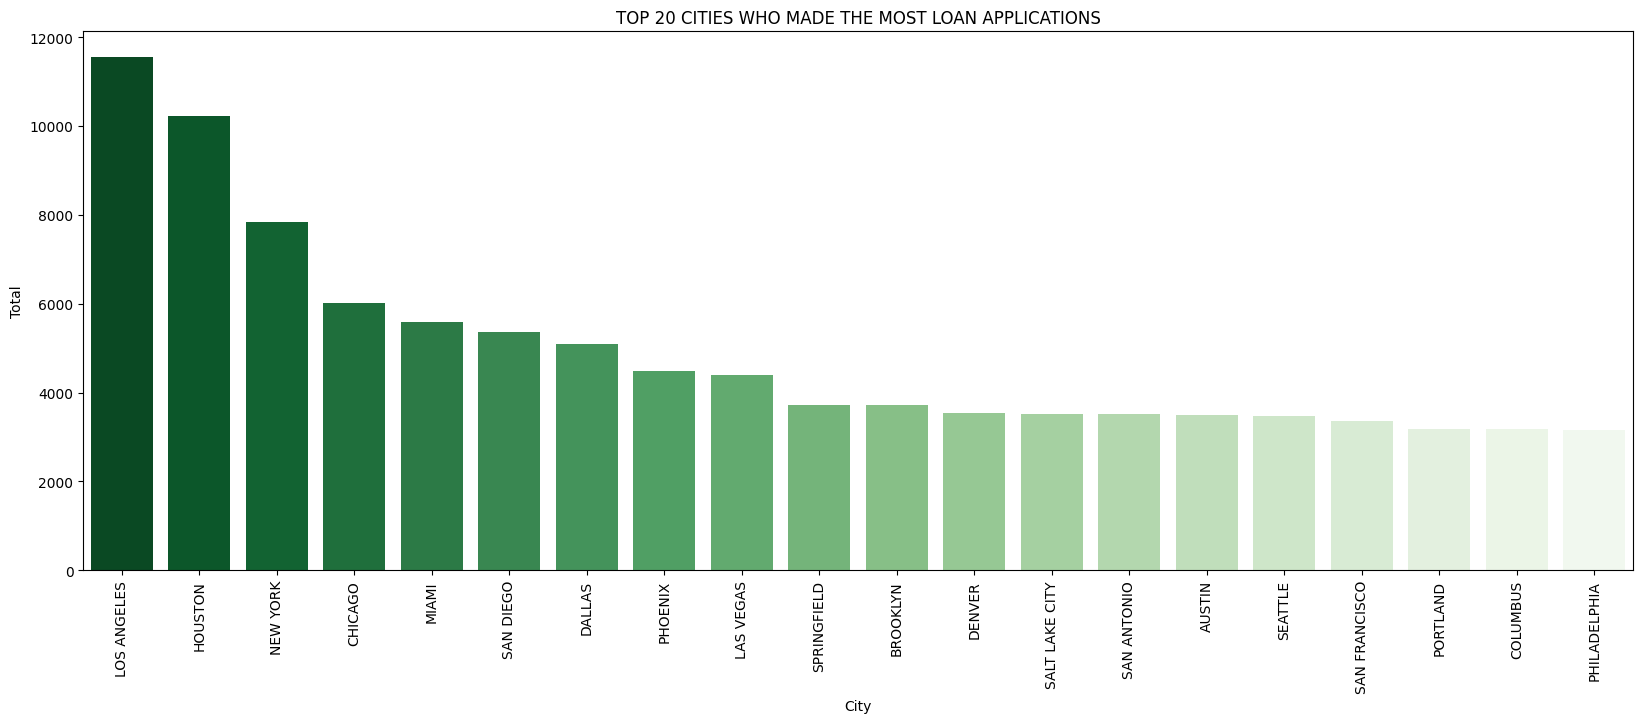

In [43]:
test = dataframe.groupby("City").count().reset_index()
test = test.rename(columns={"Name": "Total"})
test_top = test.sort_values(by="Total", ascending=False).head(20)
test_top = test_top[["City", "Total"]]
plt.figure(figsize=(20,7))
plt.title("TOP 20 CITIES WHO MADE THE MOST LOAN APPLICATIONS")
sns.barplot(test_top, x='City', y="Total", palette="Greens_r")
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\4161583242.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(test_flop, x='City', y="Total", palette="Reds_r")


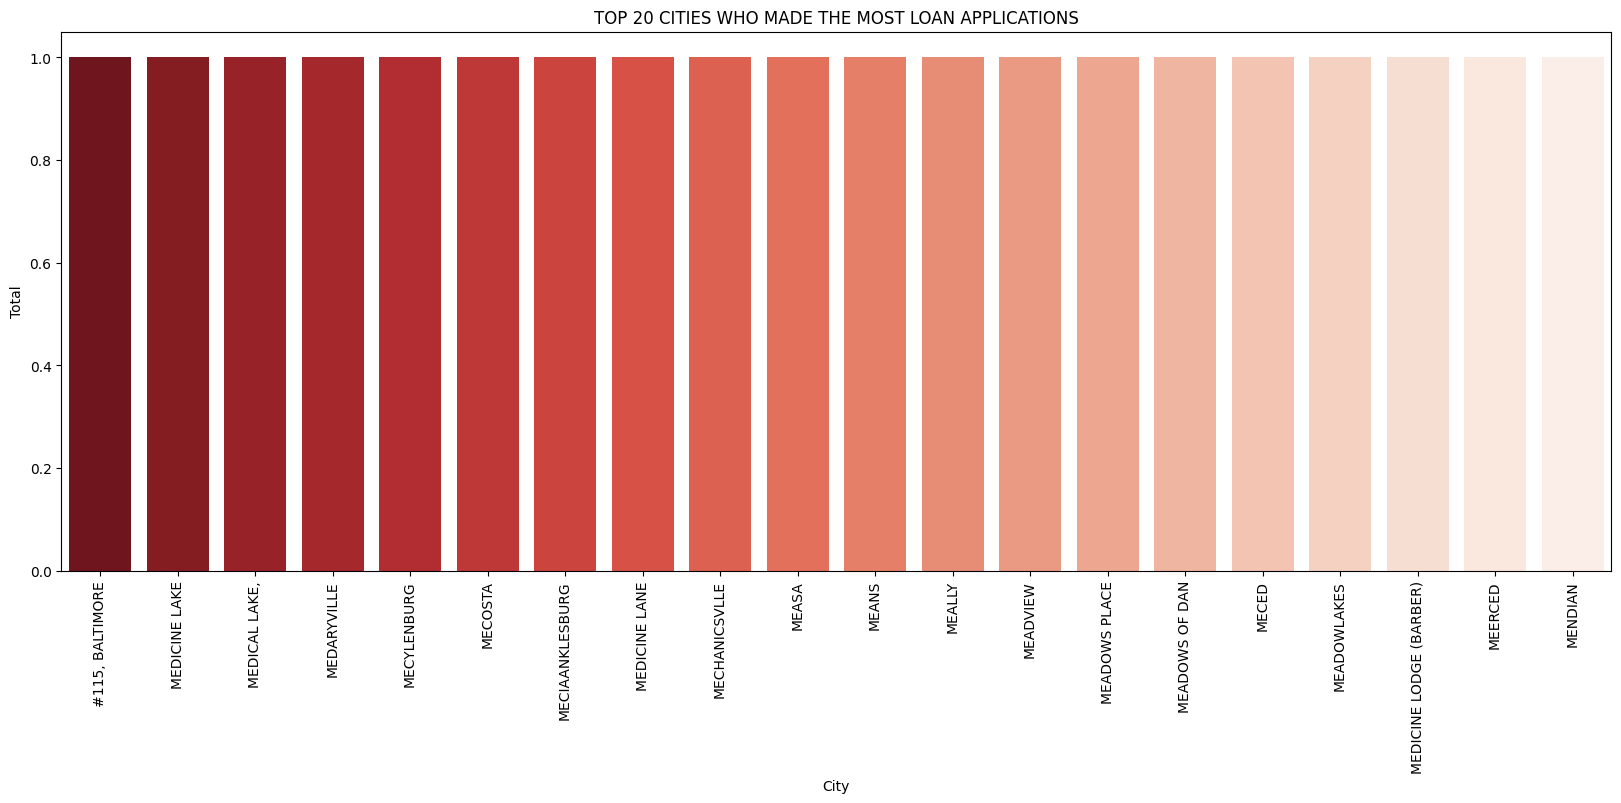

In [44]:
test_flop = test.sort_values(by="Total", ascending=True).head(20)
test_flop = test_flop[["City", "Total"]]
plt.figure(figsize=(20,7))
plt.title("TOP 20 CITIES WHO MADE THE MOST LOAN APPLICATIONS")
sns.barplot(test_flop, x='City', y="Total", palette="Reds_r")
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df = dataframe.groupby(["City"]).count().reset_index()
df = df[["City", "Name"]]
df = df.rename(columns={"Name": "Count"})
df = df.query("Count == 1")
df

City  Count
0               #115, BALTIMORE      1
1      &12151 ALCOSTA BLVD. SAN      1
2         (BOX 79) CAMP SHERMAN      1
3             (RODERFIELD) JOLO      1
4                             -      1
...                         ...    ...
32559             wEST CALDWELL      1
32560              walton hills      1
32561      warrensville heights      1
32563                 watertown      1
32564                 westfield      1

[12873 rows x 2 columns]

In [46]:
# ON PEUT REGROUPER PAR ANNEE AUSSI

In [47]:
test2 = dataframe.groupby(["City", "ApprovalYear"]).count().reset_index()
test2 = test2.sort_values(by="Name", ascending=False)
test2.head(20)

City  ApprovalYear  Name  State   Zip  Bank  BankState  NAICS  \
85687   LOS ANGELES          2004  1501   1501  1501  1501       1501   1501   
85690   LOS ANGELES          2007  1312   1312  1312  1312       1312   1312   
85686   LOS ANGELES          2003  1236   1236  1236  1236       1236   1236   
85689   LOS ANGELES          2006  1014   1014  1014  1014       1014   1014   
105311     NEW YORK          2004  1007   1007  1007  1007       1007   1007   
85688   LOS ANGELES          2005   984    984   984   984        984    984   
105313     NEW YORK          2006   940    940   940   940        940    940   
68632       HOUSTON          2006   916    916   916   916        916    916   
68630       HOUSTON          2004   899    899   899   899        899    899   
25876       CHICAGO          2006   884    884   884   884        884    884   
105312     NEW YORK          2005   852    852   852   852        852    852   
25877       CHICAGO          2007   806    806   806   806        806    806   
68631       HOUSTON          2005   802    802   802   802        802    802   
94546         MIAMI          2004   779    779   779   779        779    779   
68633       HOUSTON          2007   777    777   777   777        777    777   
105314     NEW YORK          2007   752    752   752   752        752    752   
16514      BROOKLYN          2006   742    742   742   742        742    742   
16515      BROOKLYN          2007   740    740   740   740        740    740   
68629       HOUSTON          2003   735    735   735   735        735    735   
85685   LOS ANGELES          2002   708    708   708   708        708    708   

        ApprovalFY  Term  ...  ChgOffPrinGr  GrAppv  SBA_Appv  ApprovalMonth  \
85687         1501  1501  ...          1501    1501      1501           1501   
85690         1312  1312  ...          1312    1312      1312           1312   
85686         1236  1236  ...          1236    1236      1236           1236   
85689         1014  1014  ...          1014    1014      1014           1014   
105311        1007  1007  ...          1007    1007      1007           1007   
85688          984   984  ...           984     984       984            984   
105313         940   940  ...           940     940       940            940   
68632          916   916  ...           916     916       916            916   
68630          899   899  ...           899     899       899            899   
25876          884   884  ...           884     884       884            884   
105312         852   852  ...           852     852       852            852   
25877          806   806  ...           806     806       806            806   
68631          802   802  ...           802     802       802            802   
94546          779   779  ...           779     779       779            779   
68633          777   777  ...           777     777       777            777   
105314         752   752  ...           752     752       752            752   
16514          742   742  ...           742     742       742            742   
16515          740   740  ...           740     740       740            740   
68629          735   735  ...           735     735       735            735   
85685          708   708  ...           708     708       708            708   

        ApprovalDay  ApprovalDoW  Recession  NAICS_id  Description  SameState  
85687          1501         1501       1501      1501         1501       1501  
85690          1312         1312       1312      1312         1312       1312  
85686          1236         1236       1236      1236         1236       1236  
85689          1014         1014       1014      1014         1014       1014  
105311         1007         1007       1007      1007         1007       1007  
85688           984          984        984       984          984        984  
105313          940          940        940       940          940        940  
68632        

In [48]:
dataframe.ApprovalYear.describe()

count    897167.000000
mean       2000.908150
std           5.908121
min        1966.000000
25%        1996.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalYear, dtype: float64

In [49]:
# SUPPRESSION DE LA VARIABLE "CITY"
dataframe = dataframe.drop("City", axis=1)

#### STATE

In [50]:
dataframe.State.describe()

count     897154
unique        51
top           CA
freq      130488
Name: State, dtype: object

In [51]:
dataframe.State.isnull().sum()

13

In [52]:
dataframe.query("State.isna()")
# VALEURS NAN A SUPPRIMER

Name State    Zip  \
8492           TRYON COATS & LEATHER   NaN      0   
50163     CENTURY 21 PHILLIPS REALTY   NaN  95682   
73611                  CASCO SERVICE   NaN  54205   
73876                 P & P TOOL INC   NaN  54025   
195080       VERANDA INTERIORS, INC.   NaN  76645   
278698  OLSON ELECTRIC SERVICE, INC.   NaN  75236   
278789   METRO SHEETMETAL & ERECTION   NaN  76052   
432301             WILLIAMS JEWELERS   NaN  84124   
499130    GOLF SHOES UNLIMITED, INC.   NaN  33410   
574370              JAMES A. NICHOLS   NaN  79925   
574734        LAKE MOVIE TYMES, INC.   NaN  65049   
607911             THE COMPUTER EDGE   NaN  96205   
853638             KING'S TRUCK WASH   NaN  67219   

                                  Bank BankState   NAICS  ApprovalFY  Term  \
8492      KEYBANK NATIONAL ASSOCIATION        NY       0        1966   282   
50163     SBA - EDF ENFORCEMENT ACTION        CO       0        1987   240   
73611                 UNION STATE BANK        WI       0        1990   204   
73876            FIRST BANK OF BALDWIN        WI       0        1990   240   
195080                 PROSPERITY BANK        TX       0        1997   120   
278698                 PROSPERITY BANK        TX  235310        1996    60   
278789                 PROSPERITY BANK        TX  235610        1996    84   
432301       ZIONS FIRST NATIONAL BANK        UT  448310        1990    60   
499130                  BEAL BANK, SSB        TX  451110        1990    84   
574370     WELLS FARGO BANK NATL ASSOC        TX  532230        1989    16   
574734    CENTRAL BK OF LAKE OF OZARKS        MO  532230        1990    60   
607911       RTC/WESTPORT SAVINGS BANK        CA  541511        1988    73   
853638  SOUTH CENT. KANSAS ECONOMIC DE        KS  811192        1988   120   

        NoEmp  NewExist  ...    GrAppv  SBA_Appv  ApprovalMonth  ApprovalDay  \
8492        0         0  ...   60000.0   54000.0              5           18   
50163      19         1  ...   83000.0   83000.0              2           12   
73611       8         1  ...  300000.0  252600.0             10           19   
73876       7         1  ...   82000.0   73800.0             10           26   
195080      3         1  ...  100000.0   80000.0             10           24   
278698     17         1  ...   40000.0   32000.0              7            9   
278789      3         1  ...   80000.0   64000.0              7           23   
432301      4         1  ...  250000.0  212500.0             12           14   
499130      3         2  ...   75000.0   67500.0             10           19   
574370      1         2  ...   60000.0   54000.0              5           19   
574734      1         1  ...   75000.0   67500.0              1            4   
607911      8         1  ...   50000.0   45000.0              1           21   
853638     17         2  ...  119000.0  119000.0              8            5   

       ApprovalDoW ApprovalYear Recession  NAICS_id  \
8492             1         1966     False         0   
50163            3         1987     False         0   
73611            3         1989     False         0   
73876            3         1989     False         0   
195080           3         1996     False         0   
278698           1         1996     False        23   
278789           1         1996     False        23   
432301           3         1989     False        44   
499130           3         1989     False        45   
574370           4         1989     False        53   
574734           3         1990      True        53   
607911           3         1988     False        54   
853638           4         1988     False        81   

                                             Description  SameState  
8492                                                 NaN      False  
50163                                                NaN      False  
73611                                                NaN      False  
73876                   

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\427930818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(test_top, x='State', y="Total", palette="Blues_r")


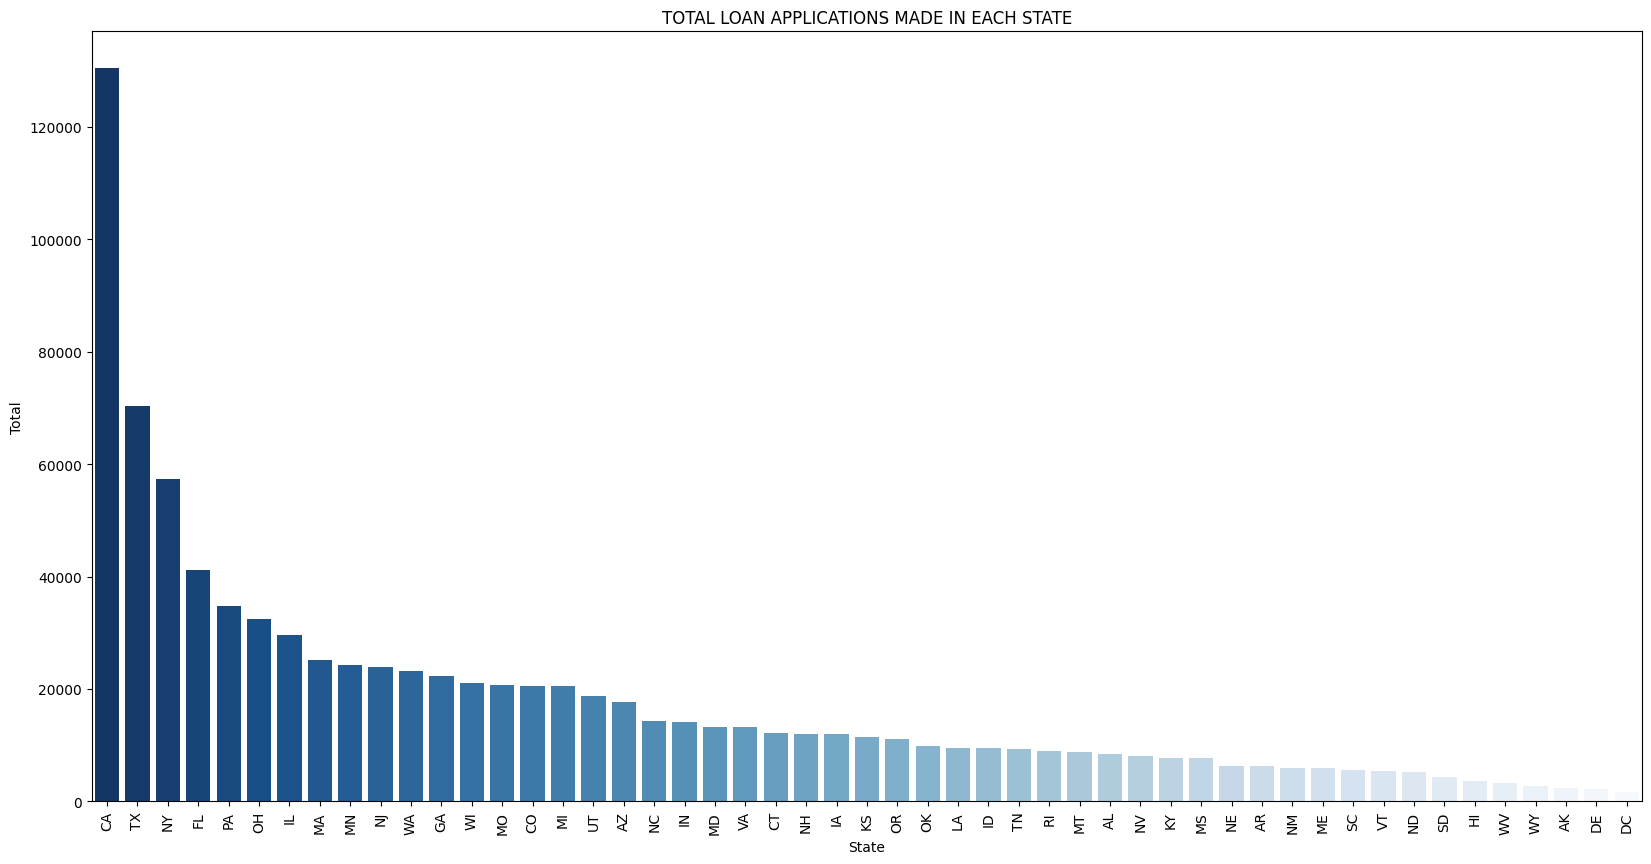

In [53]:
test = dataframe.groupby("State").count().reset_index()
test = test.rename(columns={"Name": "Total"})
test_top = test.sort_values(by="Total", ascending=False)
test_top = test_top[["State", "Total"]]
plt.figure(figsize=(20,10))
plt.title("TOTAL LOAN APPLICATIONS MADE IN EACH STATE")
sns.barplot(test_top, x='State', y="Total", palette="Blues_r")
plt.xticks(rotation='vertical')
plt.grid(False)
plt.show()

#### ZIP

In [54]:
dataframe.Zip.isnull().sum()

0

In [55]:
dataframe.Zip.describe()

count    897167.000000
mean      53856.710734
std       31170.471151
min           0.000000
25%       27612.000000
50%       55416.000000
75%       83706.000000
max       99999.000000
Name: Zip, dtype: float64

In [56]:
dataframe = dataframe.drop(columns="Zip")

#### BANK

In [57]:
dataframe.Bank.describe()

count                         895661
unique                          5801
top       BANK OF AMERICA NATL ASSOC
freq                           86773
Name: Bank, dtype: object

In [58]:
# QUE FAIRE DES NaN?
dataframe.Bank.isnull().sum()

1506

In [59]:
filtre = dataframe.Bank.value_counts() > 1
filtre.value_counts()

count
True     4878
False     923
Name: count, dtype: int64

In [60]:
dataframe.Bank = dataframe.Bank.fillna("MISSING")
dataframe.Bank.value_counts()

Bank
BANK OF AMERICA NATL ASSOC        86773
WELLS FARGO BANK NATL ASSOC       63461
JPMORGAN CHASE BANK NATL ASSOC    48131
U.S. BANK NATIONAL ASSOCIATION    35112
CITIZENS BANK NATL ASSOC          33770
                                  ...  
THOMAS CNTY FED. S & L ASSOC          1
CAPITAL BANK CORPORATION              1
AURGROUP FINANCIAL CU                 1
HAWTHORN BANCSHARES, INC              1
ALLIANCE BK OF ARIZONA A DIVIS        1
Name: count, Length: 5802, dtype: int64

In [61]:
dataframe.Bank = dataframe.Bank.fillna("Missing")

#### BANKSTATE

In [62]:
dataframe.BankState.describe()

count     895654
unique        56
top           CA
freq      118034
Name: BankState, dtype: object

In [63]:
# QUE FAIRE DES NaN?
# REMPLACER LES VALEURS NAN PAR "MISSING" (BANQUES ETRANGERES)
dataframe.BankState.isnull().sum()
dataframe.BankState = dataframe.BankState.fillna("MISSING")
dataframe.BankState.value_counts()

BankState
CA         118034
NC          79455
IL          65864
OH          58430
SD          51065
TX          47761
RI          44117
NY          39546
VA          28960
DE          24524
MN          19950
UT          18994
PA          17050
WI          15404
MO          14844
MA          13845
GA          13805
FL          13803
AL          12128
OR          11373
WA          10689
CO          10580
CT           9907
IA           9860
NJ           9434
KS           8869
MT           7848
IN           7619
SC           7471
MI           7366
OK           7322
MD           6995
NH           6794
AR           6311
MS           5924
TN           5619
NE           5336
ND           5104
LA           5057
VT           4751
NM           4416
KY           4380
NV           4323
ID           4314
DC           4003
AZ           3957
ME           3689
HI           2989
WY           2167
WV           2006
MISSING      1513
AK           1439
PR            155
GU              5
EN              1


In [64]:
dataframe.query("BankState.isna()")

Empty DataFrame
Columns: [Name, State, Bank, BankState, NAICS, ApprovalFY, Term, NoEmp, NewExist, CreateJob, RetainedJob, FranchiseCode, UrbanRural, RevLineCr, LowDoc, MIS_Status, ChgOffPrinGr, GrAppv, SBA_Appv, ApprovalMonth, ApprovalDay, ApprovalDoW, ApprovalYear, Recession, NAICS_id, Description, SameState]
Index: []

[0 rows x 27 columns]

In [65]:
test = dataframe.query("BankState.isna()")
test.Bank.value_counts()

Series([], Name: count, dtype: int64)

#### NAICS (aka : Description & NAICS_id)

In [66]:
dataframe.Description.isnull().sum()

201667

In [67]:
dataframe.Description.value_counts()

Description
Retail trade                                                     126975
Other services (except public administration)                     72395
Professional, scientific, and technical services                  67922
Manufacturing                                                     67903
Accommodation and food services                                   67511
Construction                                                      66492
Health care and social assistance                                 55264
Wholesale trade                                                   48673
Administrative/support & waste management/remediation Service     32529
Transportation and warehousing                                    22408
Arts, entertainment, and recreation                               14616
Real estate and rental and leasing                                13588
Information                                                       11362
Finance and insurance                               

In [68]:
dataframe.Description = dataframe.Description.fillna("Unknown")

In [69]:
#dataframe.query("Description.isna()")
dataframe.Description.value_counts()

Description
Unknown                                                          201667
Retail trade                                                     126975
Other services (except public administration)                     72395
Professional, scientific, and technical services                  67922
Manufacturing                                                     67903
Accommodation and food services                                   67511
Construction                                                      66492
Health care and social assistance                                 55264
Wholesale trade                                                   48673
Administrative/support & waste management/remediation Service     32529
Transportation and warehousing                                    22408
Arts, entertainment, and recreation                               14616
Real estate and rental and leasing                                13588
Information                                         

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\1871991612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(test_top, x='Description', y="Total", palette="Purples_r")


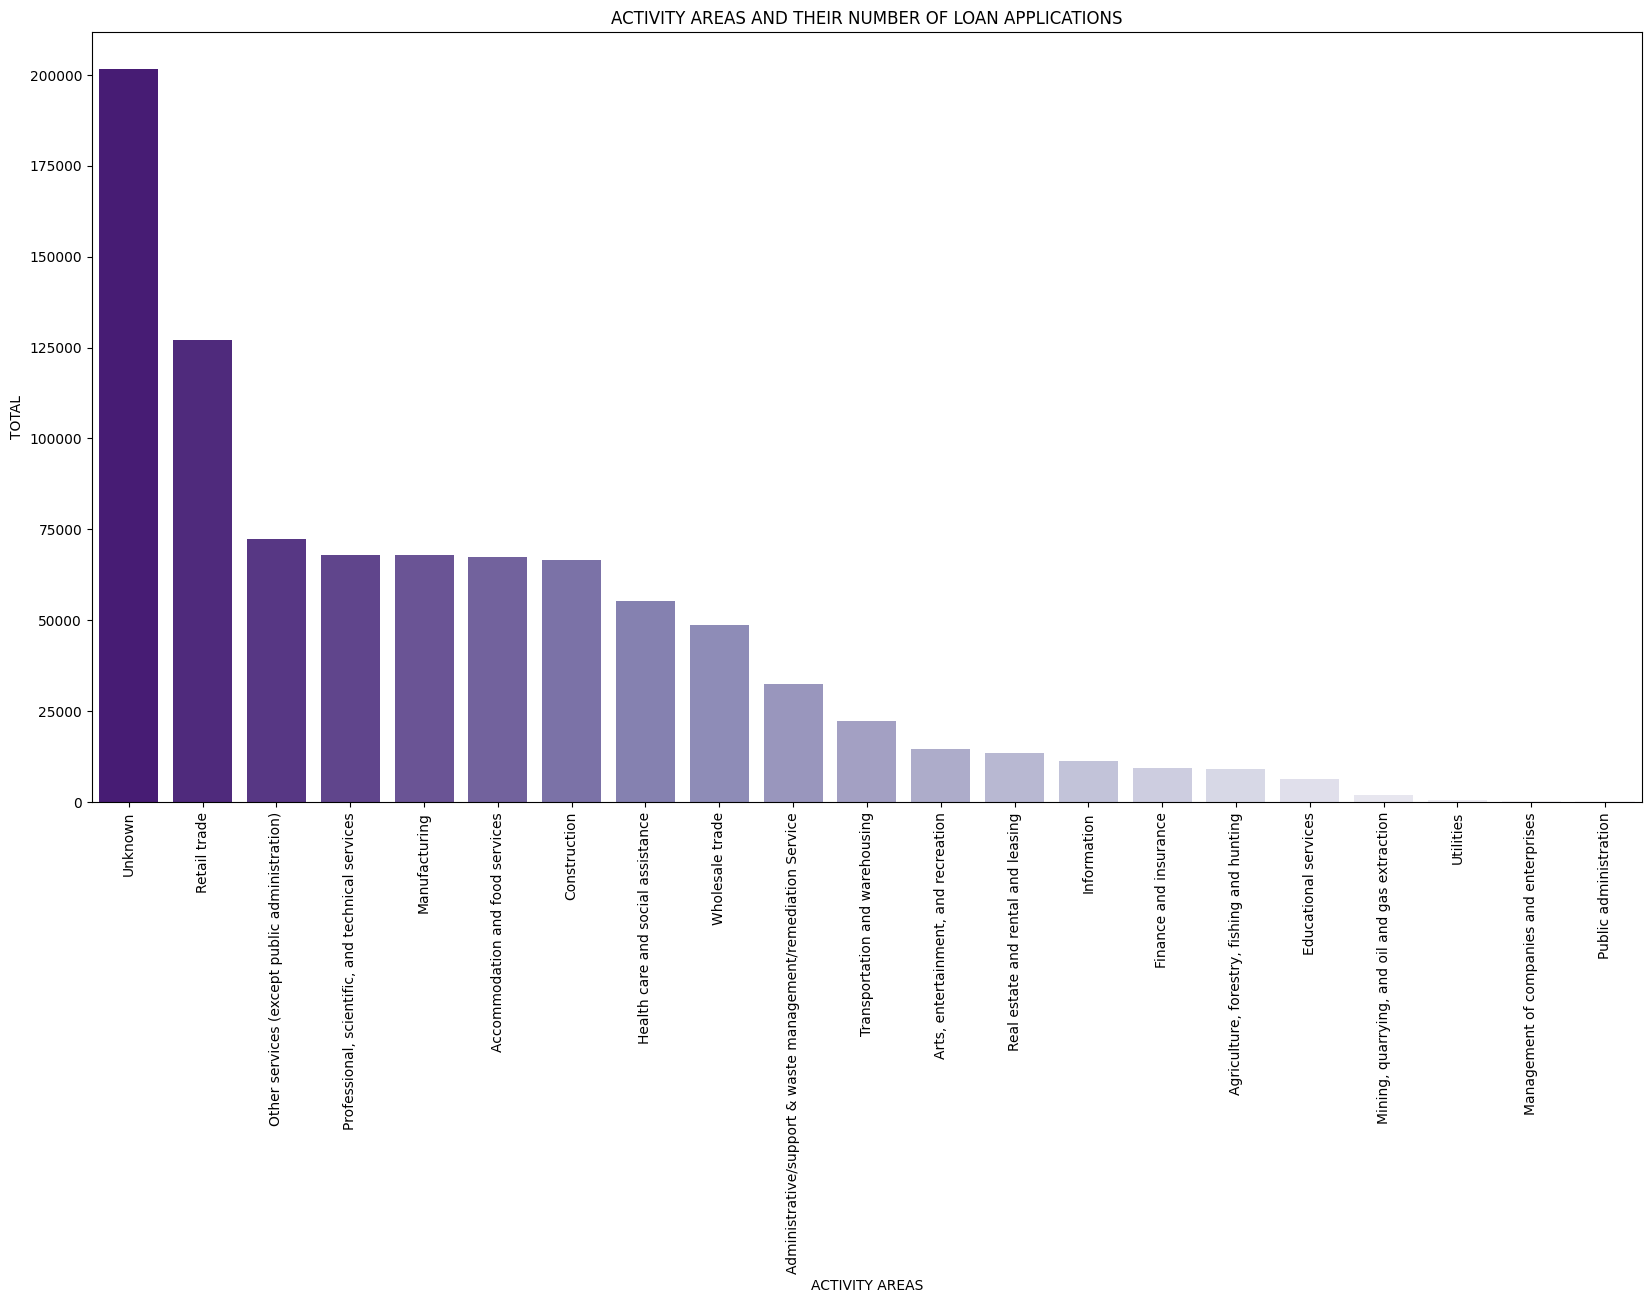

In [70]:
test = dataframe.groupby("Description").count().reset_index()
test = test.rename(columns={"Name": "Total"})
test_top = test.sort_values(by="Total", ascending=False)
test_top = test_top[["Description", "Total"]]
plt.figure(figsize=(20,10))
plt.title("ACTIVITY AREAS AND THEIR NUMBER OF LOAN APPLICATIONS")
sns.barplot(test_top, x='Description', y="Total", palette="Purples_r")
plt.xticks(rotation='vertical')
plt.xlabel("ACTIVITY AREAS")
plt.ylabel("TOTAL")
plt.show()

In [71]:
dataframe.NAICS_id.isnull().sum()

0

#### ApprovalDate = ApprovalYear, ApprovalMonth, ApprovalDay

In [72]:
dataframe.ApprovalYear.describe()

count    897167.000000
mean       2000.908150
std           5.908121
min        1966.000000
25%        1996.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalYear, dtype: float64

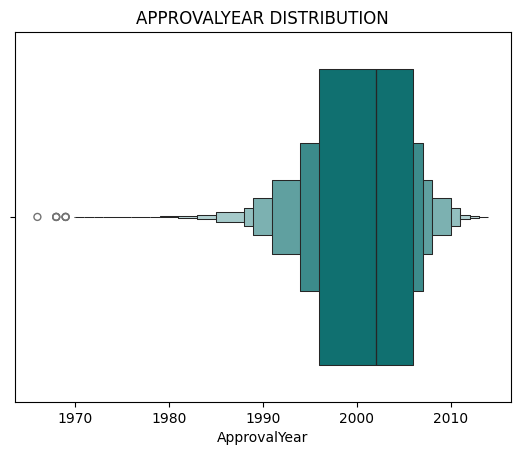

In [73]:
sns.boxenplot(data=dataframe, x="ApprovalYear", color="teal")
plt.title("APPROVALYEAR DISTRIBUTION")
plt.show()

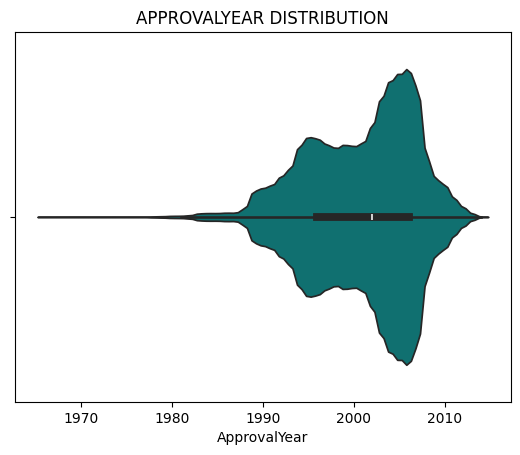

In [74]:
sns.violinplot(x=dataframe.ApprovalYear, color="teal")
plt.title("APPROVALYEAR DISTRIBUTION")
plt.show()

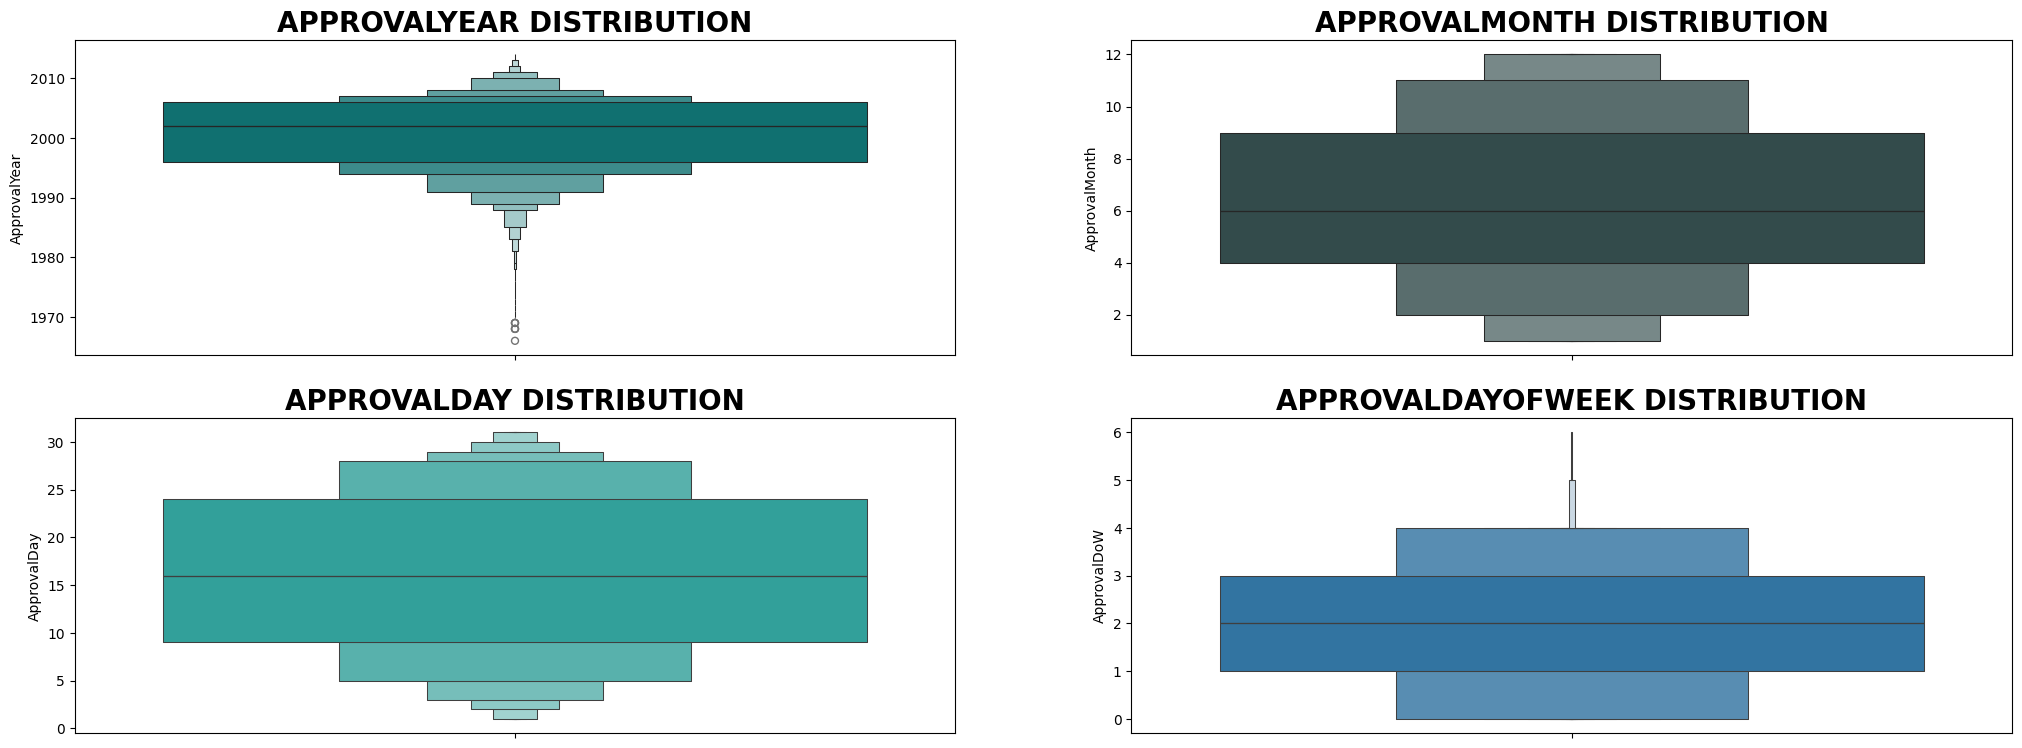

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(25,9))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.boxenplot(data=dataframe.ApprovalYear, ax=axes[0, 0], color="teal")
axes[0,0].set_title("APPROVALYEAR DISTRIBUTION", fontweight='bold', fontsize=20)

# Deuxième graphique
sns.boxenplot(data=dataframe.ApprovalMonth, ax=axes[0, 1], color="darkslategray")
axes[0,1].set_title("APPROVALMONTH DISTRIBUTION", fontweight='bold', fontsize=20)

# Troisième graphique
sns.boxenplot(data=dataframe.ApprovalDay, ax=axes[1, 0], color="lightseagreen")
axes[1,0].set_title("APPROVALDAY DISTRIBUTION", fontweight='bold', fontsize=20)

# Quatrième graphique
sns.boxenplot(data=dataframe.ApprovalDoW, ax=axes[1, 1])
axes[1,1].set_title("APPROVALDAYOFWEEK DISTRIBUTION", fontweight='bold', fontsize=20)

# Réglage de l'espacement entre les subplots
# plt.tight_layout()

plt.show()

In [76]:
dataframe.ApprovalMonth.describe()

count    897167.000000
mean          6.483538
std           3.361659
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: ApprovalMonth, dtype: float64

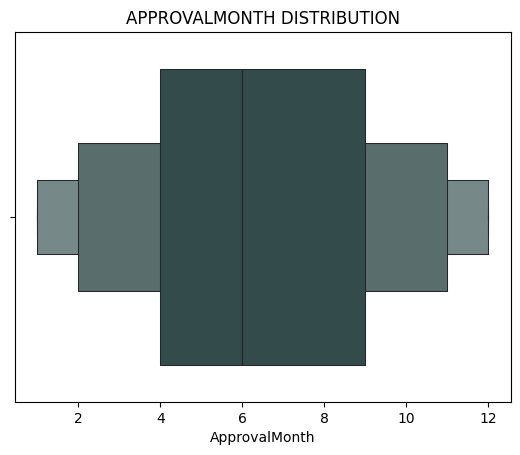

In [77]:
sns.boxenplot(data=dataframe, x="ApprovalMonth", color='darkslategrey')
plt.title("APPROVALMONTH DISTRIBUTION")
plt.show()

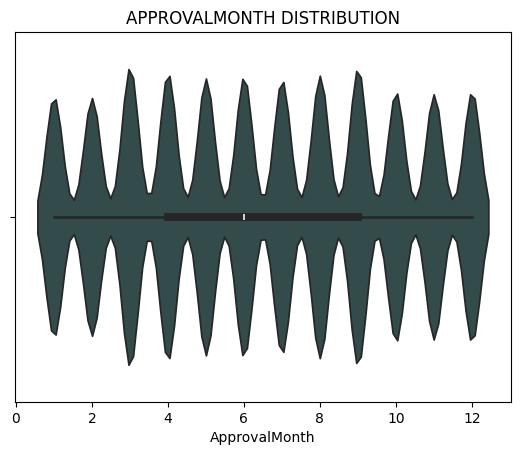

In [78]:
sns.violinplot(x=dataframe.ApprovalMonth, color="darkslategrey")
plt.title("APPROVALMONTH DISTRIBUTION")
plt.show()

In [79]:
dataframe.ApprovalDay.describe()

count    897167.000000
mean         16.188073
std           8.763399
min           1.000000
25%           9.000000
50%          16.000000
75%          24.000000
max          31.000000
Name: ApprovalDay, dtype: float64

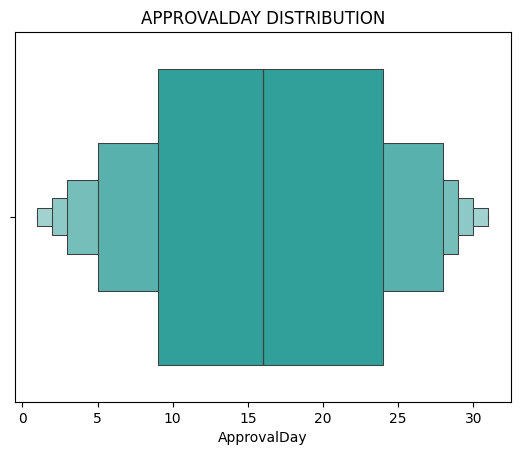

In [80]:
sns.boxenplot(data=dataframe, x="ApprovalDay", color='lightseagreen')
plt.title("APPROVALDAY DISTRIBUTION")
plt.show()

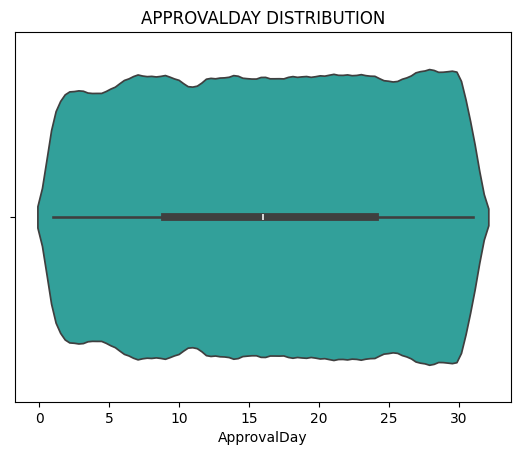

In [81]:
sns.violinplot(x=dataframe.ApprovalDay, color="lightseagreen")
plt.title("APPROVALDAY DISTRIBUTION")
plt.show()

In [82]:
# 0 NaN dans les 3 variables
dataframe.ApprovalDay.isnull().sum()

0

#### ApprovalFY

In [83]:
dataframe.ApprovalFY.isnull().sum()

0

In [84]:
dataframe.ApprovalFY.describe()

count    897167.000000
mean       2001.139677
std           5.912461
min        1966.000000
25%        1997.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalFY, dtype: float64

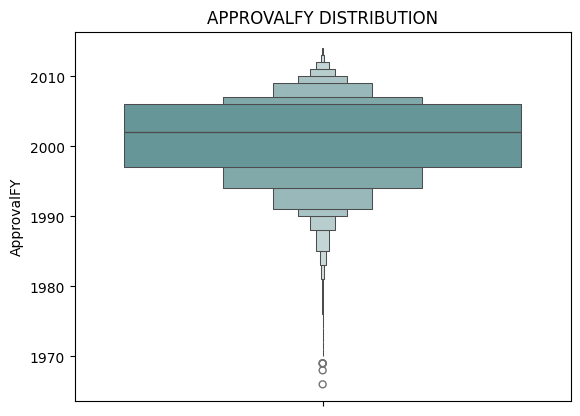

In [85]:
sns.boxenplot(dataframe.ApprovalFY, color='cadetblue')
plt.title("APPROVALFY DISTRIBUTION")
plt.show()

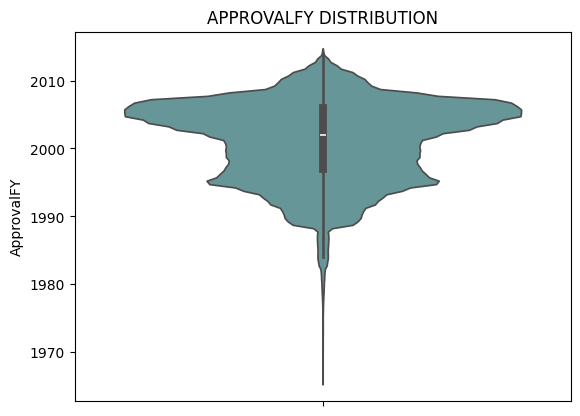

In [86]:
sns.violinplot(dataframe.ApprovalFY, color='cadetblue')
plt.title("APPROVALFY DISTRIBUTION")
plt.show()

#### Term

In [87]:
dataframe.Term.isnull().sum()

0

In [88]:
dataframe.Term.describe()

count    897167.000000
mean        110.848592
std          78.900862
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Term, dtype: float64

In [89]:
test = dataframe.query("Term == 0")
test.MIS_Status.value_counts()

MIS_Status
CHGOFF    734
P I F      72
Name: count, dtype: int64

In [90]:
calcul = 569/12
calcul

47.416666666666664

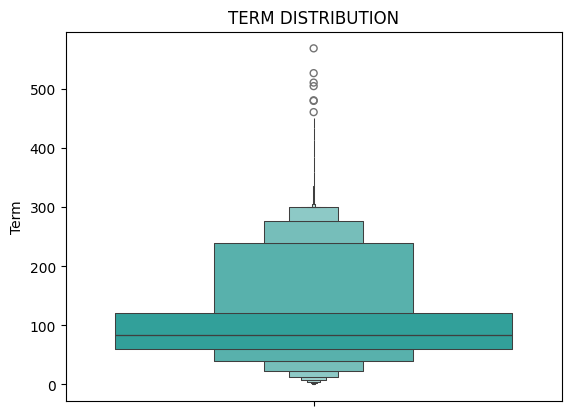

In [91]:
sns.boxenplot(dataframe.Term, color='lightseagreen')
plt.title("TERM DISTRIBUTION")
plt.show()

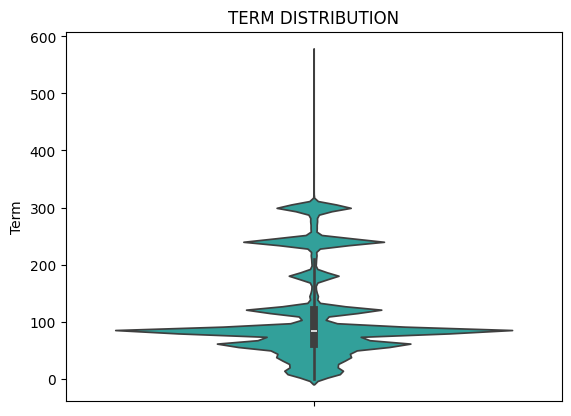

In [92]:
sns.violinplot(dataframe.Term, color='lightseagreen')
plt.title("TERM DISTRIBUTION")
plt.show()

#### NoEmp

In [93]:
dataframe.NoEmp.isnull().sum()

0

In [94]:
dataframe.NoEmp.describe()

count    897167.000000
mean         11.412562
std          73.793775
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

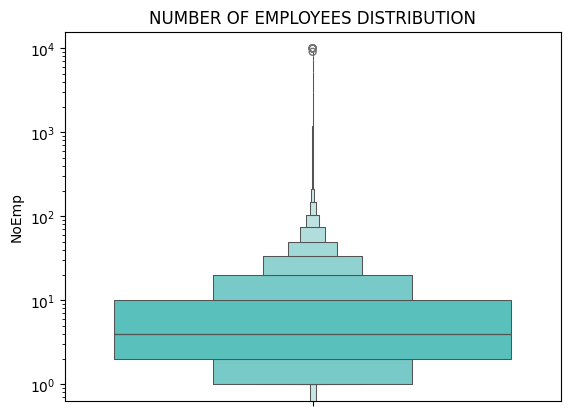

In [95]:
sns.boxenplot(dataframe.NoEmp, color='mediumturquoise')
plt.title("NUMBER OF EMPLOYEES DISTRIBUTION")
plt.yscale('log')
plt.show()

#### NewExist

In [96]:
dataframe.NewExist.value_counts(dropna=False)
# REMPLACER 2 PAR TRUE ET TOUT LE RESTE PAR FALSE (VOIR NOTEBOOK GREG)
def encode_NewExist(x: float) -> bool:
    if x > 1.5:
        return True
    return False
dataframe.NewExist = dataframe.NewExist.map(encode_NewExist)

In [97]:
# Séparer le dataframe en deux (deux (ou trois) variables de NewExist)
# Faire un boxplot pour chaque valeur de NewExist
# Faire un pie-plot pour montrer le %

In [98]:
# Mettre les (3) dans (0)
dataframe.NewExist.replace(3, 1, inplace=True)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\1409498457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe.NewExist.replace(3, 1, inplace=True)


In [99]:
dataframe.NewExist.isnull().sum()

0

In [100]:
dataframe.NewExist.value_counts()

NewExist
False    644608
True     252559
Name: count, dtype: int64

In [101]:
# Séparer le dataframe en deux (deux (ou trois) variables de NewExist)

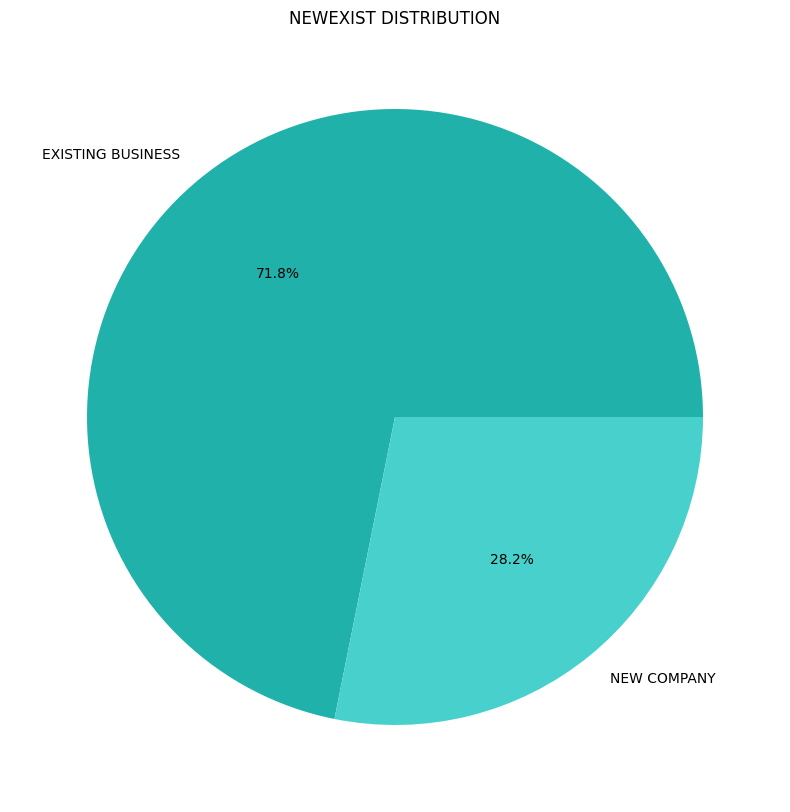

In [102]:
colors = ["lightseagreen",  "mediumturquoise"]
labels = ["EXISTING BUSINESS", "NEW COMPANY"]
plt.figure(figsize=(10, 10))
plt.pie(dataframe.NewExist.value_counts(), colors=colors, labels=labels, autopct='%1.1f%%')
plt.title("NEWEXIST DISTRIBUTION")
plt.show()

#### CreateJob

In [103]:
dataframe.CreateJob.describe()

count    897167.000000
mean          8.444305
std         236.950249
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: CreateJob, dtype: float64

In [104]:
dataframe.CreateJob.isnull().sum()

0

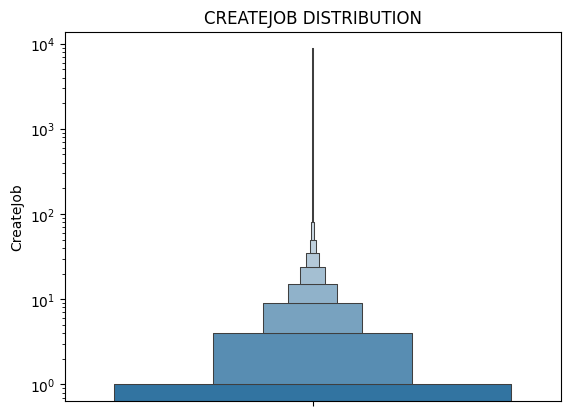

In [105]:
sns.boxenplot(dataframe.CreateJob)
plt.yscale('log')
plt.title("CREATEJOB DISTRIBUTION")
plt.show()

#### RetainedJob

In [106]:
dataframe.RetainedJob.describe()

count    897167.000000
mean         10.807308
std         237.382398
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9500.000000
Name: RetainedJob, dtype: float64

In [107]:
dataframe.RetainedJob.isnull().sum()

0

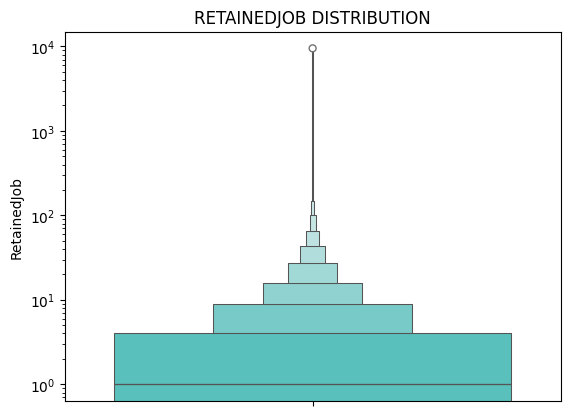

In [108]:
sns.boxenplot(dataframe.RetainedJob, color="mediumturquoise")
plt.yscale('log')
plt.title("RETAINEDJOB DISTRIBUTION")
plt.show()

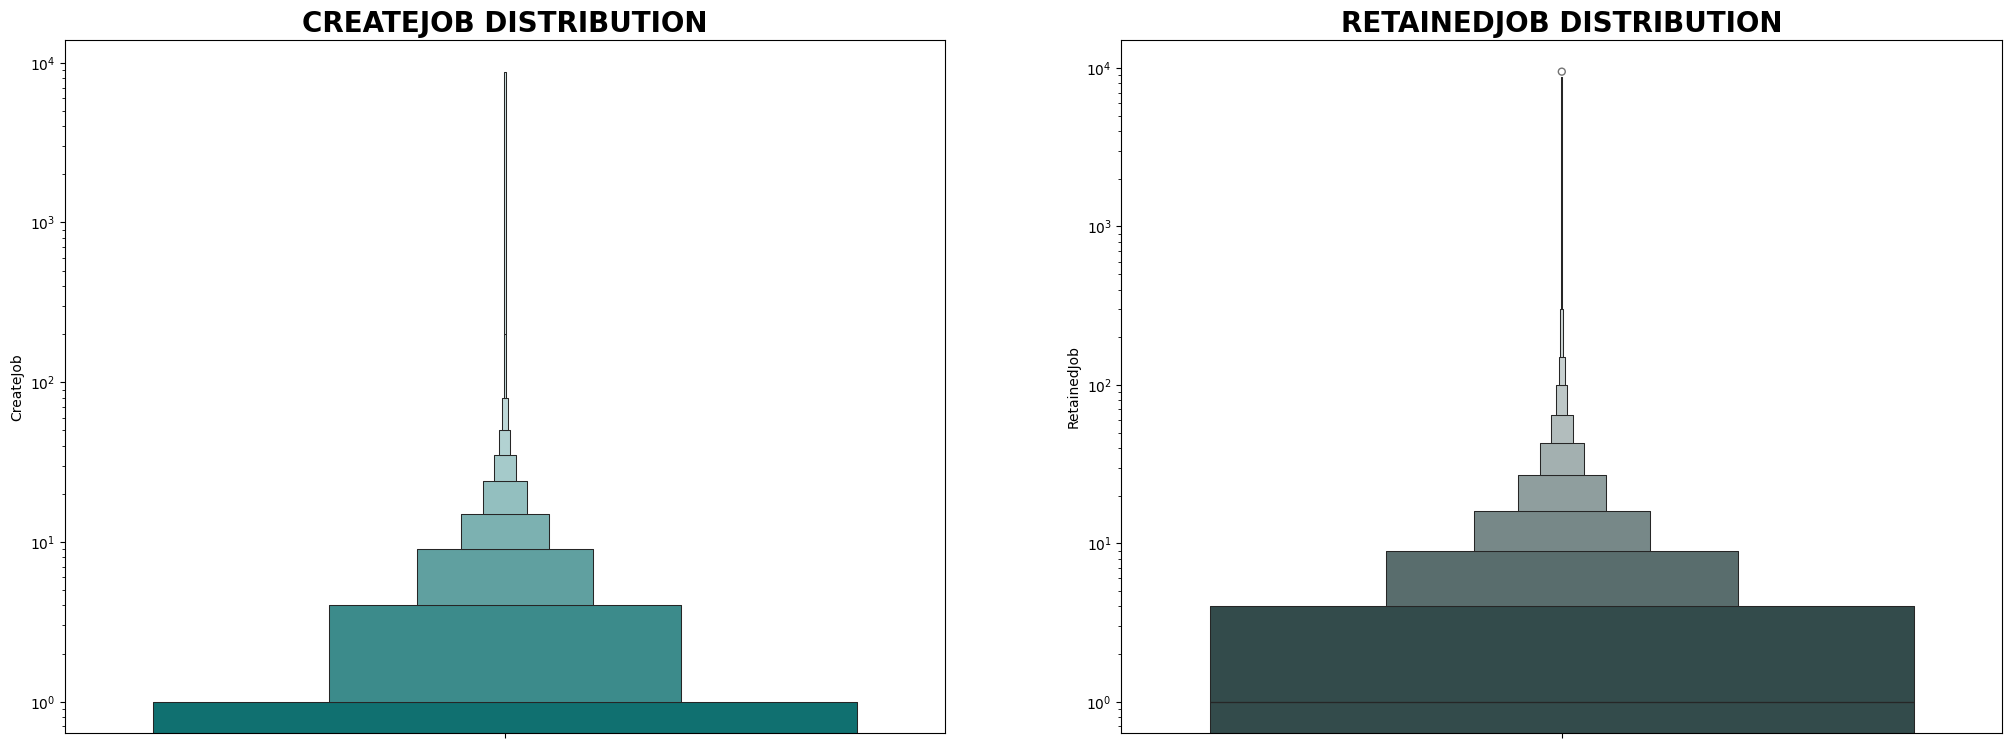

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(25,9))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.boxenplot(data=dataframe.CreateJob, ax=axes[0], color="teal")
axes[0].set_title("CREATEJOB DISTRIBUTION", fontweight='bold', fontsize=20)
axes[0].set_yscale('log')

# Deuxième graphique
sns.boxenplot(data=dataframe.RetainedJob, ax=axes[1], color="darkslategray")
axes[1].set_title("RETAINEDJOB DISTRIBUTION", fontweight='bold', fontsize=20)
axes[1].set_yscale('log')
plt.show()

#### FranchiseCode

In [110]:
dataframe.FranchiseCode.describe()

count    897167.000000
mean       2757.528287
std       12767.025962
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       99999.000000
Name: FranchiseCode, dtype: float64

In [111]:
dataframe.FranchiseCode.isnull().sum()

0

In [112]:
dataframe.FranchiseCode.dtypes

dtype('int64')

In [113]:
def change_franchise(data):
    if data == 0 or data == 1:
        return 0
    else:
        return 1

# dataframe.FranchiseCode = dataframe.FranchiseCode.apply(change_franchise)
data.FranchiseCode = data.FranchiseCode.apply(change_franchise)
dataframe.FranchiseCode = dataframe.FranchiseCode.apply(change_franchise)
dataset.FranchiseCode = dataset.FranchiseCode.apply(change_franchise)
dataframe.FranchiseCode.value_counts()

FranchiseCode
0    845435
1     51732
Name: count, dtype: int64

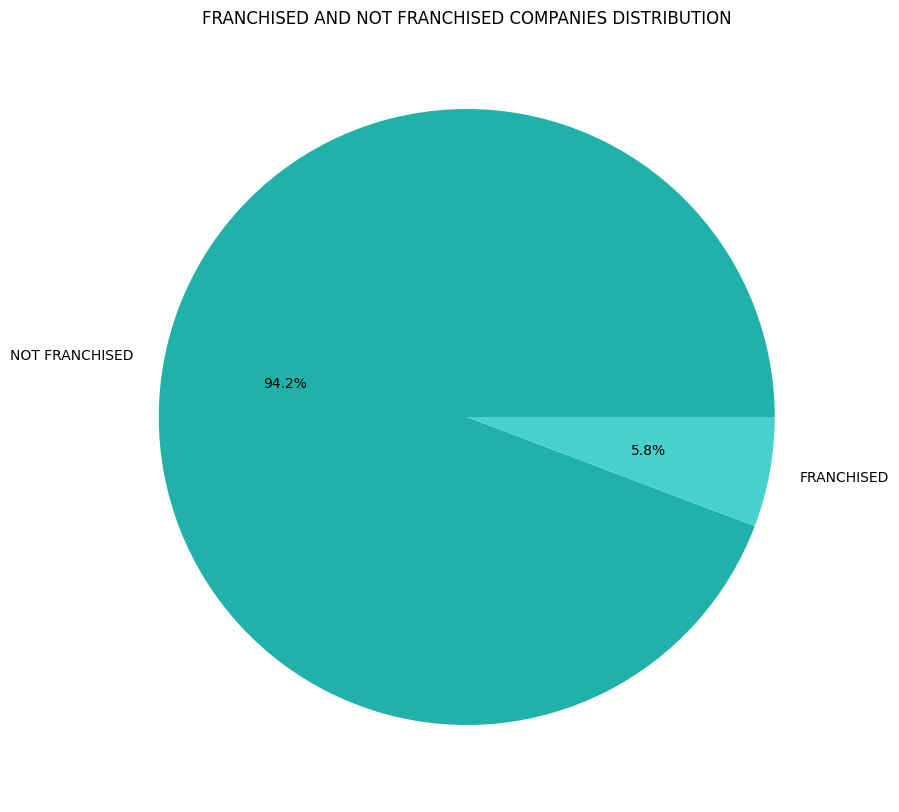

In [114]:
plt.figure(figsize=(10,10))
labels = ["NOT FRANCHISED", "FRANCHISED"]
colors = ["lightseagreen", "mediumturquoise", "paleturquoise"]
plt.title("FRANCHISED AND NOT FRANCHISED COMPANIES DISTRIBUTION")
plt.pie(dataframe.FranchiseCode.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

#### UrbanRural

In [115]:
dataframe.UrbanRural.describe()

count    897167.000000
mean          0.757274
std           0.646540
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: UrbanRural, dtype: float64

In [116]:
dataframe.UrbanRural.isnull().sum()

0

In [117]:
dataframe.UrbanRural.value_counts()

UrbanRural
1    469281
0    322826
2    105060
Name: count, dtype: int64

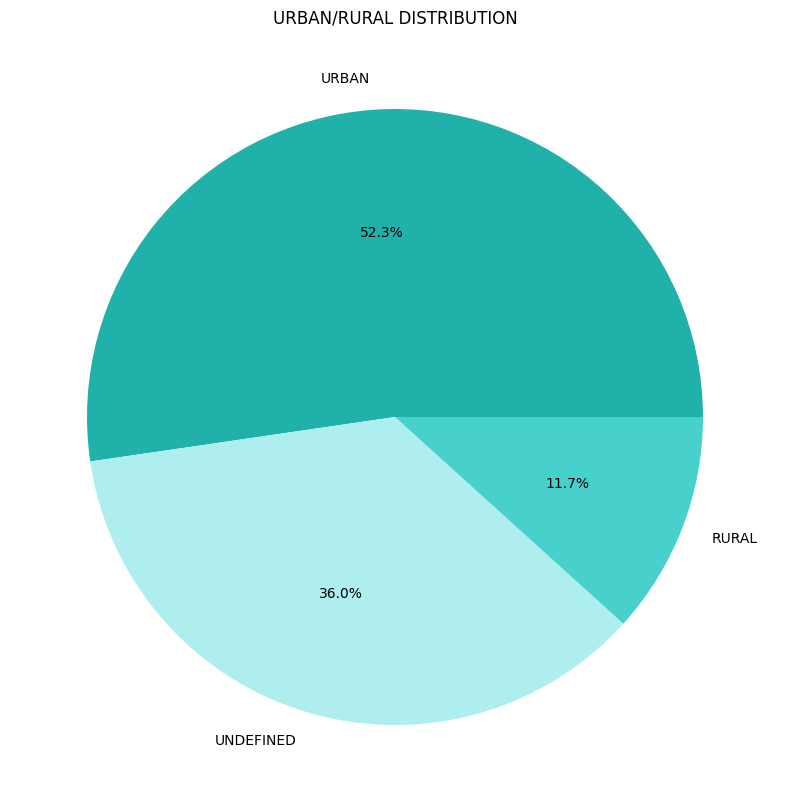

In [118]:
plt.figure(figsize=(10,10))
labels = ["URBAN", "UNDEFINED", "RURAL"]
colors = ["lightseagreen", "paleturquoise", "mediumturquoise"]
plt.title("URBAN/RURAL DISTRIBUTION")
plt.pie(dataframe.UrbanRural.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [119]:
# MODIFICATION DES VALEURS DE LA VARIABLE UrbanRural
mapping = {0: "M", 1: "U", 2: "R"}
dataframe["UrbanRural"] = dataframe["UrbanRural"].map(mapping)
dataframe.UrbanRural.value_counts()

UrbanRural
U    469281
M    322826
R    105060
Name: count, dtype: int64

#### RevLineCR & LowDoc

In [120]:
dataframe.RevLineCr.describe()

count     892647
unique        18
top            N
freq      419252
Name: RevLineCr, dtype: object

In [121]:
dataframe.RevLineCr.isnull().sum()

4520

In [122]:
dataframe.RevLineCr.value_counts()

RevLineCr
N    419252
0    257431
Y    200660
T     15239
1        23
R        14
`        11
2         6
C         2
,         1
-         1
A         1
Q         1
4         1
.         1
5         1
3         1
7         1
Name: count, dtype: int64

In [123]:
def change(value):
    if value != "N" and value != "Y":
        return "UNKNOWN"
    return value

dataframe["RevLineCr"] = dataframe["RevLineCr"].apply(change)
dataframe.RevLineCr.value_counts()

RevLineCr
N          419252
UNKNOWN    277255
Y          200660
Name: count, dtype: int64

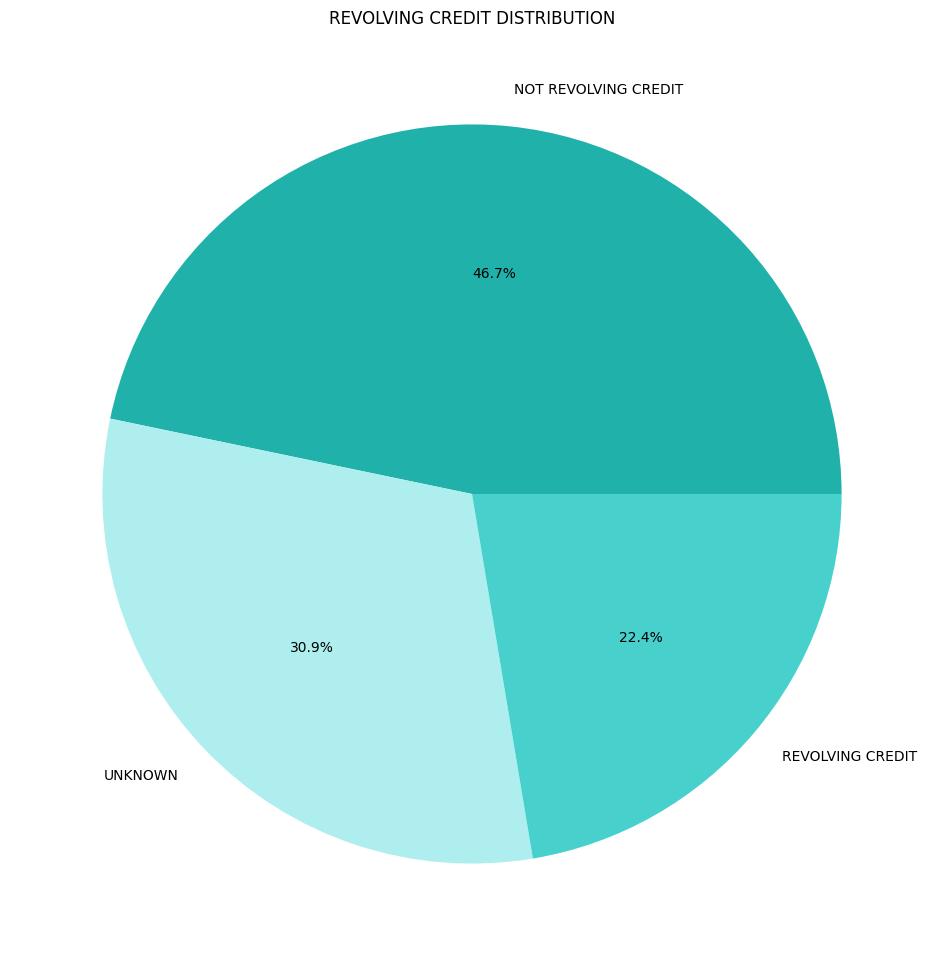

In [124]:
labels = ["NOT REVOLVING CREDIT", "UNKNOWN", "REVOLVING CREDIT"]
colors = ["lightseagreen", "paleturquoise", "mediumturquoise"]
plt.figure(figsize=(12,12))
plt.pie(dataframe.RevLineCr.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("REVOLVING CREDIT DISTRIBUTION")
plt.show()

In [125]:
# Mettre les valeurs bizarres de LowDoc dans Y (YES)
# Prendre la fonction sur notebook Greg

In [126]:
dataframe.LowDoc.isnull().sum()

2578

In [127]:
dataframe.LowDoc.value_counts()

LowDoc
N    780997
Y    110171
0      1490
C       758
S       603
A       495
R        74
1         1
Name: count, dtype: int64

In [128]:
def encode_LowDoc(s: "object") -> str:
    if s == "N":
        return s
    return "Y"

dataframe.LowDoc = dataframe.LowDoc.map(encode_LowDoc)
dataframe.LowDoc.value_counts()

LowDoc
N    780997
Y    116170
Name: count, dtype: int64

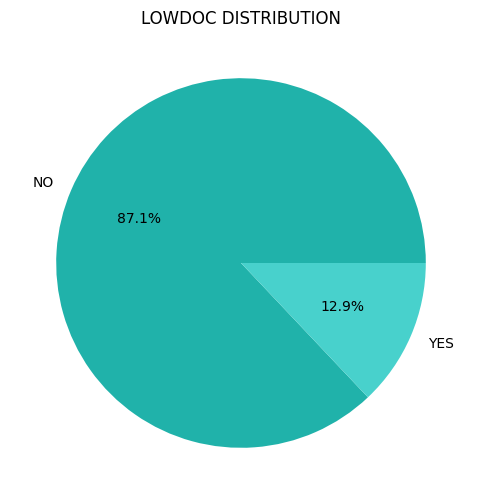

In [129]:
# PIE CHART A FAIRE POUR LOWDOC
labels = ["NO", "YES"]
colors = ["lightseagreen", "mediumturquoise"]
plt.figure(figsize=(10,6))
plt.pie(dataframe.LowDoc.value_counts().head(2), autopct='%1.1f%%', colors=colors, labels=labels)
plt.title("LOWDOC DISTRIBUTION")
plt.show()

#### GrAppv & SBA_Appv (voire notebook Greg)

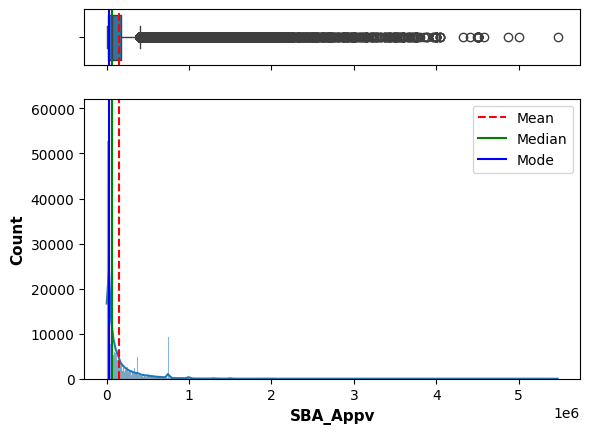

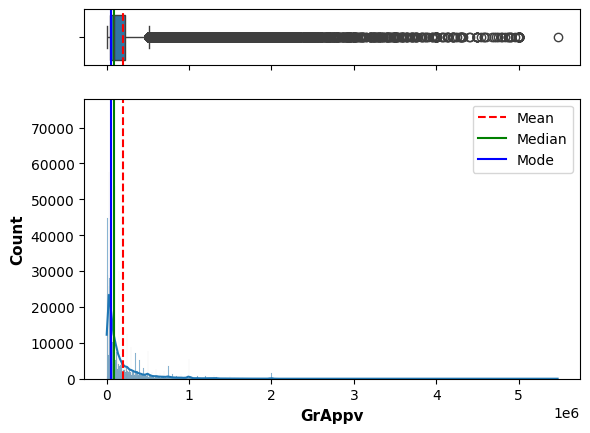

In [130]:
def hist_box_plot(col: str, df: pd.DataFrame, out: bool = False) -> None:
    """
    Display an histogram and a boxplot of df[col],
    col being a continuous numerical variable.
    `out` set to True allows to export the graph in .png format.
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode().values[0]
     
    sns.boxplot(data=df, x=col, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')
     
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
     
    ax_hist.legend(loc='best')
     
    # Set x-axis label
    ax_hist.set_xlabel(col, fontsize=11, fontweight='bold')

    # Set y-axis label for the histogram
    ax_hist.set_ylabel('Count', fontsize=11, fontweight='bold')

    # Clear the x-axis label for the boxplot (as they share the same x-axis)
    ax_box.set(xlabel='')

hist_box_plot("SBA_Appv", dataframe)
hist_box_plot("GrAppv", dataframe)

In [131]:
dataframe.GrAppv 

0          35000.0
1         229000.0
2         600000.0
3          70000.0
4         370000.0
            ...   
899159    160000.0
899160     90000.0
899161     55000.0
899162     50000.0
899163     50000.0
Name: GrAppv, Length: 897167, dtype: float64

#### Recession

In [132]:
dataframe.Recession.value_counts()

Recession
False    708049
True     189118
Name: count, dtype: int64

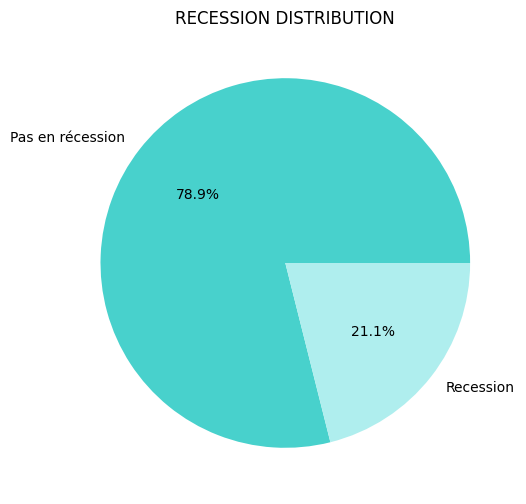

In [133]:
labels = ["Pas en récession", "Recession"]
colors = ["mediumturquoise", "paleturquoise"]
plt.figure(figsize=(10,6))

plt.pie(dataframe.Recession.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("RECESSION DISTRIBUTION")
plt.show()

In [134]:
dataframe.Recession.describe()

count     897167
unique         2
top        False
freq      708049
Name: Recession, dtype: object

#### TARGET

In [135]:
dataframe.MIS_Status.describe()

count     897167
unique         2
top        P I F
freq      739609
Name: MIS_Status, dtype: object

In [136]:
dataframe.MIS_Status.isnull().sum()

0

In [137]:
dataframe.MIS_Status.value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [138]:
def encode_PIF(s: "object") -> str:
    if s == "P I F":
        return "PIF"
    return s

dataframe.MIS_Status = dataframe.MIS_Status.map(encode_PIF)
dataframe.MIS_Status.value_counts()

MIS_Status
PIF       739609
CHGOFF    157558
Name: count, dtype: int64

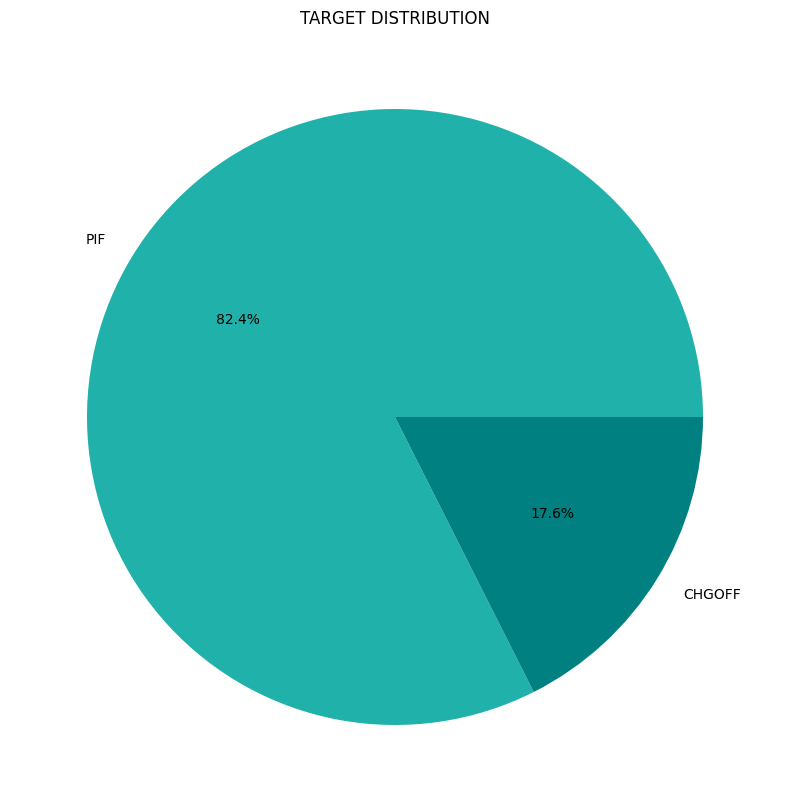

In [139]:
plt.figure(figsize=(10,10))
labels = ["PIF", "CHGOFF"]
colors = ["lightseagreen", "teal"]
plt.title("TARGET DISTRIBUTION")
plt.pie(dataframe.MIS_Status.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', wedgeprops=None)
plt.show()

#### SAMESTATE

In [140]:
dataframe.SameState.value_counts() 

SameState
True     473425
False    423742
Name: count, dtype: int64

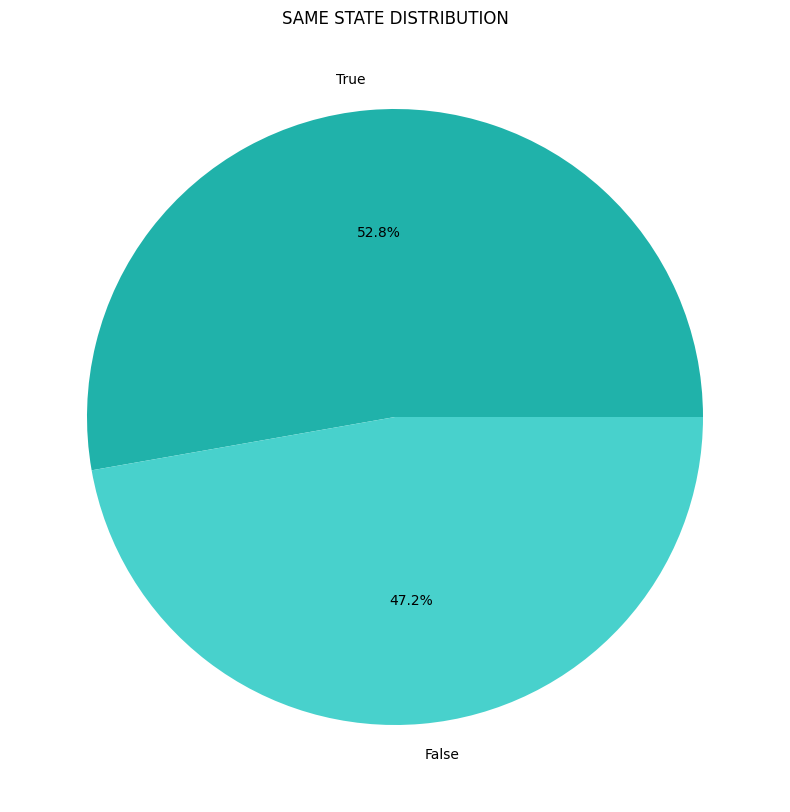

In [141]:
plt.figure(figsize=(10,10))
labels = ["True", "False"]
colors = ["lightseagreen", "mediumturquoise"]
plt.title("SAME STATE DISTRIBUTION")
plt.pie(dataframe.SameState.value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

In [142]:
dataframe.columns

Index(['Name', 'State', 'Bank', 'BankState', 'NAICS', 'ApprovalFY', 'Term',
       'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv', 'ApprovalMonth', 'ApprovalDay', 'ApprovalDoW',
       'ApprovalYear', 'Recession', 'NAICS_id', 'Description', 'SameState'],
      dtype='object')

#### TESTS MAISON

In [143]:
# pip install geopandas matplotlib

In [144]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [146]:
import plotly.express as px 
df = dataframe.copy()
df = df.groupby('State').count().reset_index()
df = df[["State", "BankState"]]
df = df.rename(columns={'BankState':'Total loan applications made'})

fig = px.choropleth(df,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Total loan applications made',
                    hover_name = 'State',
                    hover_data = 'Total loan applications made',
                    range_color=[0,120000],
                    color_continuous_scale='viridis',
                    title='NUMBER OF LOAN APPLICATIONS MADE BY EACH STATE ACROSS THE YEARS')
# fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [147]:
import plotly.express as px 
df = dataframe.copy()
df = df.groupby(['State', 'ApprovalYear'],).count().sort_values(by='ApprovalYear', ascending=True).reset_index()
df = df[["State", "BankState", 'ApprovalYear']]
df = df.rename(columns={'BankState':'Total loan applications made'})

fig = px.choropleth(df,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Total loan applications made',
                    hover_name = 'State',
                    hover_data = 'Total loan applications made',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='VIRIDIS',
                    title='NUMBER OF LOAN APPLICATIONS MADE BY EACH STATE YEAR BY YEAR')
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(width=800, height=800)
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [148]:
import plotly.express as px 
df = dataframe.copy()
filtre_target = df["MIS_Status"] == "PIF"
df2 = df[filtre_target]
df2 = df2.groupby(['State', 'ApprovalYear'],).count().sort_values(by='ApprovalYear', ascending=True).reset_index()
df2 = df2[["State", "BankState", 'ApprovalYear']]
df2 = df2.rename(columns={'BankState':'Total loans paid back in full'})

fig = px.choropleth(df2,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Total loans paid back in full',
                    hover_name = 'State',
                    hover_data = 'Total loans paid back in full',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='plasma',
                    title='NUMBER OF LOANS PAID BACK IN FULL OVER TIME')
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(width=800, height=600)
fig.update_layout(title_text='NUMBER OF LOANS PAID BACK IN FULL ACROSS THE YEARS', title_x=0.5)
#fig.add_annotation(text='Note: Ajoutez des annotations ici.', x=0.5, y=-0.1, showarrow=False, font=dict(size=10))
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [149]:
dataframe.head(2)

Name State                           Bank  \
0  BIG BUCKS PAWN & JEWELRY, LLC    OK  1ST NATL BK & TR CO OF BROKEN   
1    ANASTASIA CONFECTIONS, INC.    FL        FLORIDA BUS. DEVEL CORP   

  BankState  NAICS  ApprovalFY  Term  NoEmp  NewExist  CreateJob  ...  \
0        OK      0        1997    60      2     False          0  ...   
1        FL      0        1997   240     14     False          7  ...   

     GrAppv  SBA_Appv ApprovalMonth ApprovalDay ApprovalDoW ApprovalYear  \
0   35000.0   28000.0             2          28           4         1997   
1  229000.0  229000.0             2          28           4         1997   

   Recession  NAICS_id  Description  SameState  
0      False         0      Unknown       True  
1      False         0      Unknown       True  

[2 rows x 27 columns]

In [150]:
import plotly.express as px 
df = dataframe.copy()
filtre_target = df["MIS_Status"] == "P I F"
df2 = df[~filtre_target]
df2 = df2.groupby(['State', 'ApprovalYear'],).count().sort_values(by='ApprovalYear', ascending=True).reset_index()
df2 = df2[["State", "BankState", 'ApprovalYear']]
df2 = df2.rename(columns={'BankState':'Number of loans not paid back'})

fig = px.choropleth(df2,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Number of loans not paid back',
                    hover_name = 'State',
                    hover_data = 'Number of loans not paid back',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='viridis',
                    title='NUMBER OF LOANS THAT HAVE NOT BEEN PAID BACK')
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(width=800, height=600)
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [151]:
import plotly.express as px 
df = dataframe.copy()
# filtre_target = df["MIS_Status"] == "P I F"
# df2 = df[~filtre_target]
df2 = df.groupby(['State', 'ApprovalYear'],).sum('SBA_Appv').sort_values(by='ApprovalYear', ascending=True).reset_index()
df2 = df2[["State", "SBA_Appv", 'ApprovalYear']]
df2 = df2.rename(columns={'SBA_Appv':'Amount guaranteed by SBA'})

fig = px.choropleth(df2,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Amount guaranteed by SBA',
                    hover_name = 'State',
                    hover_data = 'Amount guaranteed by SBA',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='viridis',
                    title='AMOUNT OF LOANS GUARANTEED BY SBA TO EACH STATE OVER TIME')
# fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(width=800, height=600)
fig.add_annotation(text='Note: Ajoutez des annotations ici.', x=0.5, y=-0.1, showarrow=False, font=dict(size=10))
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [152]:
df_test = dataframe.copy()
df_test = df_test[["State", "ChgOffPrinGr", "ApprovalYear"]]

def amount_to_float(s: str) -> float:
    """Converts a 'string' amount in $ to its float value"""
    return float(s[1:].replace(',', ''))
# df_test["ChgOffPrinGr"] = df_test["ChgOffPrinGr"].apply(amount_to_float)

df_test = df_test.groupby(["State", "ApprovalYear"])["ChgOffPrinGr"].sum().reset_index()
df_test = df_test.sort_values(by="ApprovalYear", ascending=True)
df_test 

State  ApprovalYear  ChgOffPrinGr
155     CA          1968      159769.0
673     KY          1968       40110.0
1512    PA          1969           0.0
1390    OH          1969      119183.0
1345    NY          1969        3387.0
...    ...           ...           ...
1911    WA          2014           0.0
874     ME          2014           0.0
392     FL          2014           0.0
283     CT          2014           0.0
2027    WY          2014           0.0

[2028 rows x 3 columns]

In [153]:
df_test = dataframe.copy()
df_test = df_test[["State", "ChgOffPrinGr", "ApprovalYear"]]

# def amount_to_float(s: str) -> float:
#     """Converts a 'string' amount in $ to its float value"""
#     return float(s[1:].replace(',', ''))
# df_test["ChgOffPrinGr"] = df_test["ChgOffPrinGr"].apply(amount_to_float)

df_test = df_test.groupby(["State", "ApprovalYear"])["ChgOffPrinGr"].sum().reset_index()
df_test = df_test.sort_values(by="ApprovalYear", ascending=True)



df_test = df_test.rename(columns={'ChgOffPrinGr':'Amount guaranteed by SBA but not paid back'})

fig = px.choropleth(df_test,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Amount guaranteed by SBA but not paid back',
                    hover_name = 'State',
                    hover_data = 'Amount guaranteed by SBA but not paid back',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='viridis',
                    title='TOTAL AMOUNTS GUARANTEED BY SBA EACH YEAR THAT WERE NOT PAID BACK')
# fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(width=800, height=600)
fig.add_annotation(text='Note: Ajoutez des annotations ici.', x=0.5, y=-0.1, showarrow=False, font=dict(size=10))
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [154]:
# NOUVEAUX TESTS

In [155]:
pd.set_option('display.max_columns', None)
dataframe.head(1)

Name State                           Bank  \
0  BIG BUCKS PAWN & JEWELRY, LLC    OK  1ST NATL BK & TR CO OF BROKEN   

  BankState  NAICS  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
0        OK      0        1997    60      2     False          0            0   

   FranchiseCode UrbanRural RevLineCr LowDoc MIS_Status  ChgOffPrinGr  \
0              0          M         N      Y        PIF           0.0   

    GrAppv  SBA_Appv  ApprovalMonth  ApprovalDay  ApprovalDoW  ApprovalYear  \
0  35000.0   28000.0              2           28            4          1997   

   Recession  NAICS_id Description  SameState  
0      False         0     Unknown       True

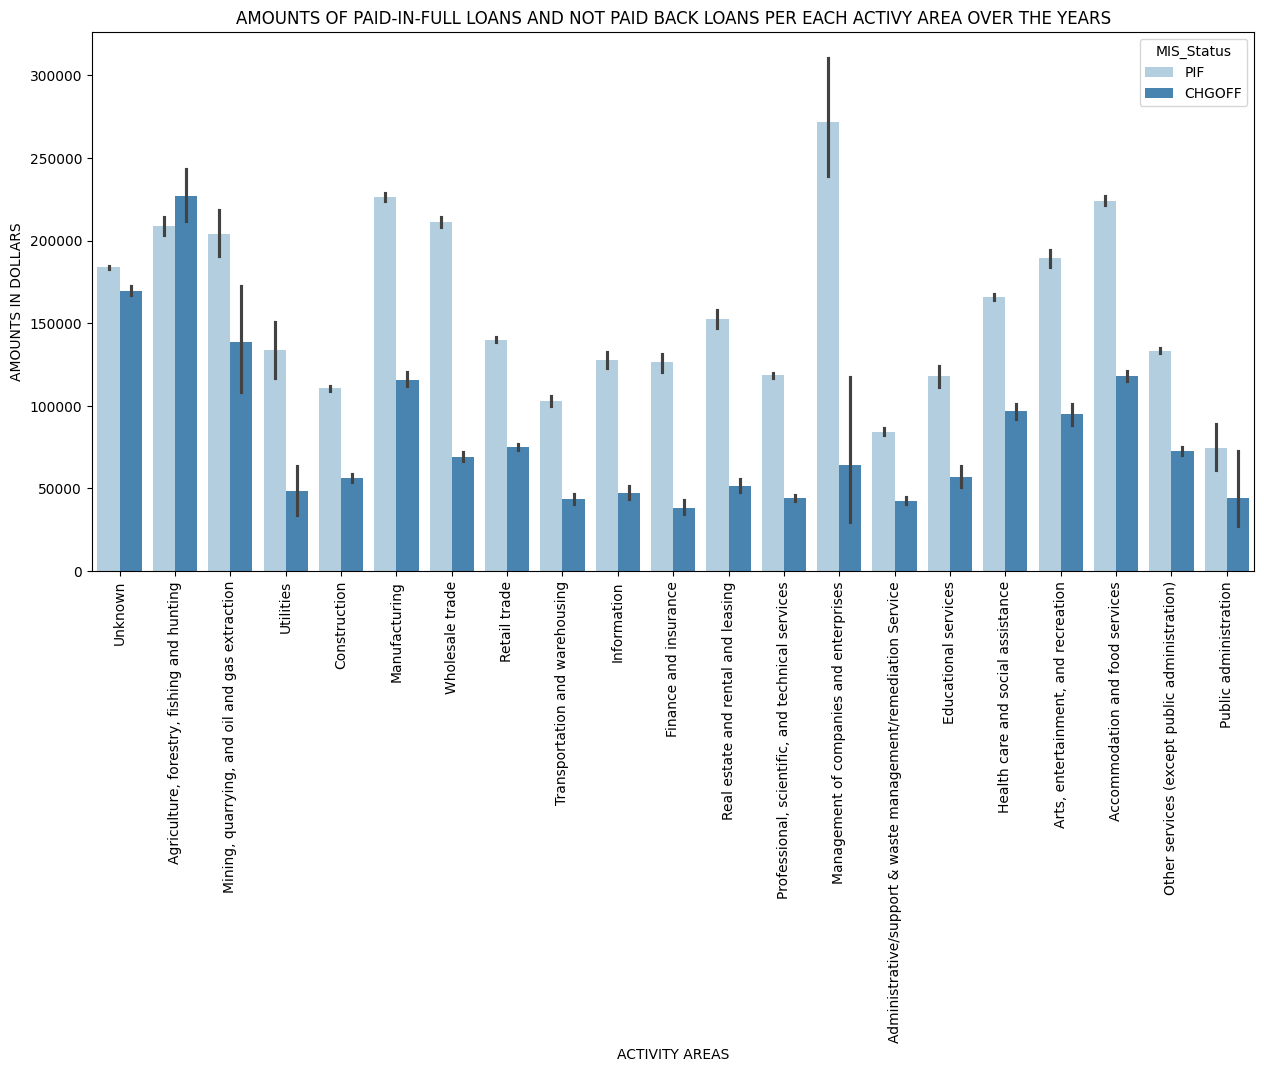

In [156]:
df = dataframe.copy()
filtre_PIF = df["MIS_Status"] == "P I F"
df_PIF = df[filtre_PIF]
df_ChgOFF = df[~filtre_PIF]


df = df.groupby(['Description', 'MIS_Status'])["SBA_Appv"].sum().reset_index()


df = df[["Description", "SBA_Appv", "MIS_Status"]]
df = df.sort_values(by="SBA_Appv", ascending=False)
df = df.groupby(["Description", "MIS_Status"]).agg({'SBA_Appv': 'first'}).reset_index()

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df 

plt.figure(figsize=(15,7))
sns.barplot(dataframe, x="Description", y="SBA_Appv", hue="MIS_Status", palette="Blues")
plt.xlabel("ACTIVITY AREAS")
plt.ylabel("AMOUNTS IN DOLLARS")
plt.title("AMOUNTS OF PAID-IN-FULL LOANS AND NOT PAID BACK LOANS PER EACH ACTIVY AREA OVER THE YEARS")
plt.xticks(rotation='vertical')
plt.show()

In [157]:
df_test = dataframe[['RevLineCr', 'LowDoc']]

def change_values(data):
    if data == "Y":
        return 1
    if data == "N":
        return 0
    else:
        return 2
    return data

df_test["RevLineCr"] = df_test["RevLineCr"].apply(change_values)
df_test["LowDoc"] = df_test["LowDoc"].apply(change_values)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\3553690059.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\3553690059.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



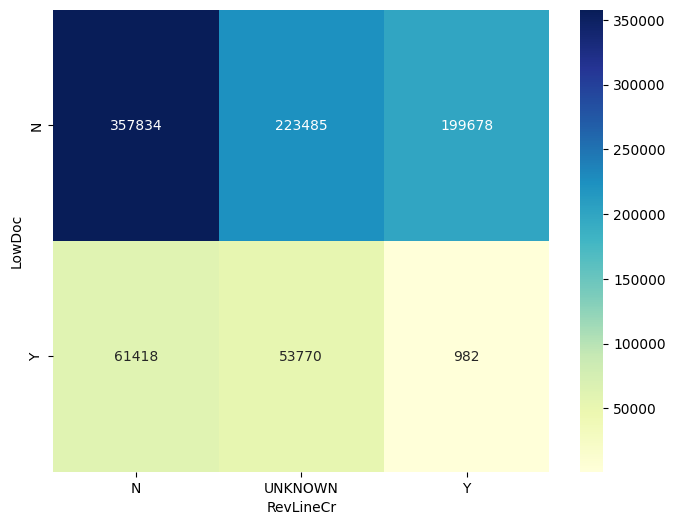

In [158]:
data_heatmap = pd.crosstab(index=dataframe["LowDoc"], columns=dataframe["RevLineCr"])
plt.figure(figsize=(8, 6))
sns.heatmap(data_heatmap, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('RevLineCr')
plt.ylabel('LowDoc')
plt.show()

In [159]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.graphics.mosaicplot import mosaic

# # Créer un diagramme en mosaïque
# plt.figure(figsize=(8, 6))
# mosaic(dataframe, ['LowDoc', 'RevLineCr'], gap=0.01)
# plt.title('Diagramme en mosaïque')
# plt.show()

### DOUBLONS

In [160]:
dataframe.duplicated().value_counts()

False    896958
True        209
Name: count, dtype: int64

In [161]:
doublons = dataframe.duplicated(keep=False)
dataframe[doublons].groupby("Name").transform('first')

State                            Bank BankState   NAICS  ApprovalFY  \
120       PA     WELLS FARGO BANK NATL ASSOC        PA       0        1998   
122       PA     WELLS FARGO BANK NATL ASSOC        PA       0        1998   
7261      MA         STATE STREET BK & TR CO        MA       0        1997   
7267      MA         STATE STREET BK & TR CO        MA       0        1997   
10714     NM              BANK OF NEW MEXICO        NM       0        1997   
...      ...                             ...       ...     ...         ...   
880621    CA       CDC SMALL BUS. FINAN CORP        CA  811191        2003   
880895    PA  PNC BANK, NATIONAL ASSOCIATION        DE  811211        2004   
880896    PA  PNC BANK, NATIONAL ASSOCIATION        DE  811211        2004   
886594    MA        CITIZENS BANK NATL ASSOC        RI  812112        2004   
886596    MA        CITIZENS BANK NATL ASSOC        RI  812112        2004   

        Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
120       60     46     False          0            0              1   
122       60     46     False          0            0              1   
7261       5     26     False          0            0              0   
7267       5     26     False          0            0              0   
10714     12      1     False          0            0              0   
...      ...    ...       ...        ...          ...            ...   
880621   240      5      True          3            0              0   
880895    60      4     False          6            4              0   
880896    60      4     False          6            4              0   
886594    84      3     False          0            3              0   
886596    84      3     False          0            3              0   

       UrbanRural RevLineCr LowDoc MIS_Status  ChgOffPrinGr    GrAppv  \
120             M   UNKNOWN      N        PIF          0.00 100000.00   
122             M   UNKNOWN      N        PIF          0.00 100000.00   
7261            M         N      N        PIF          0.00  46771.00   
7267            M         N      N        PIF          0.00  46771.00   
10714           M         N      N        PIF          0.00 175000.00   
...           ...       ...    ...        ...           ...       ...   
880621          U         N      N        PIF          0.00 235000.00   
880895          R   UNKNOWN      N        PIF          0.00  18000.00   
880896          R   UNKNOWN      N        PIF          0.00  18000.00   
886594          U         Y      N        PIF          0.00  10000.00   
886596          U         Y      N        PIF          0.00  10000.00   

        SBA_Appv  ApprovalMonth  ApprovalDay  ApprovalDoW  ApprovalYear  \
120     50000.00             12            4            3          1997   
122     50000.00             12            4            3          1997   
7261    35078.00              6           10            1          1997   
7267    35078.00              6           10            1          1997   
10714  157500.00              7           29            1          1997   
...          ...            ...          ...          ...           ...   
880621 235000.00              9           25            3          2003   
880895   9000.00             10            7            1          2003   
880896   9000.00             10            7            1          2003   
886594   5000.00              7            7            2          2004   
886596   5000.00              7            7            2          2004   

        Recession  NAICS_id                                    Description  \
120         False         0                                        Unknown   
122         False         0                                        Unknown   
7261        False         0                                        Unknown   
7267        False         0                                        Unknown   
10714       False         0          

In [162]:
dataframe.CreateJob.describe()

count   897167.00
mean         8.44
std        236.95
min          0.00
25%          0.00
50%          0.00
75%          1.00
max       8800.00
Name: CreateJob, dtype: float64

In [163]:
df_test = dataframe.copy()
df_test = df_test[["State", "CreateJob", "ApprovalYear"]]

# def amount_to_float(s: str) -> float:
#     """Converts a 'string' amount in $ to its float value"""
#     return float(s[1:].replace(',', ''))
# df_test["ChgOffPrinGr"] = df_test["ChgOffPrinGr"].apply(amount_to_float)

df_test = df_test.groupby(["State", "ApprovalYear"])["CreateJob"].sum().reset_index()
df_test = df_test.sort_values(by="ApprovalYear", ascending=True)



df_test = df_test.rename(columns={'CreateJob':'Number of jobs created thanks to loans'})

fig = px.choropleth(df_test,
                    locations='State',
                    locationmode='USA-states',
                    scope="usa",
                    color='Number of jobs created thanks to loans',
                    hover_name = 'State',
                    hover_data = 'Number of jobs created thanks to loans',
                    animation_frame='ApprovalYear',
                    color_continuous_scale='viridis',
                    title='TOTAL JOBS CREATED THANKS TO LOANS')
# fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(width=800, height=600)
fig.add_annotation(text='Note: Ajoutez des annotations ici.', x=0.5, y=-0.1, showarrow=False, font=dict(size=10))
fig.show()

c:\Users\Thibaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [164]:
# A FAIRE

# Continuer l'analyse bivariée (croiser les features numériques (surtout features importantes voir noteboog greg collab))
# Lancer une première gridsearch pour recherche de paramètres
# Focus sur F1 macro
# Revoir pipelines et transformers ---> télécharger notebook collab greg
# Faire courbes RAUC et tester d'autres modèles (ex XGBoost ---> verif si il effectue du targetencoding)

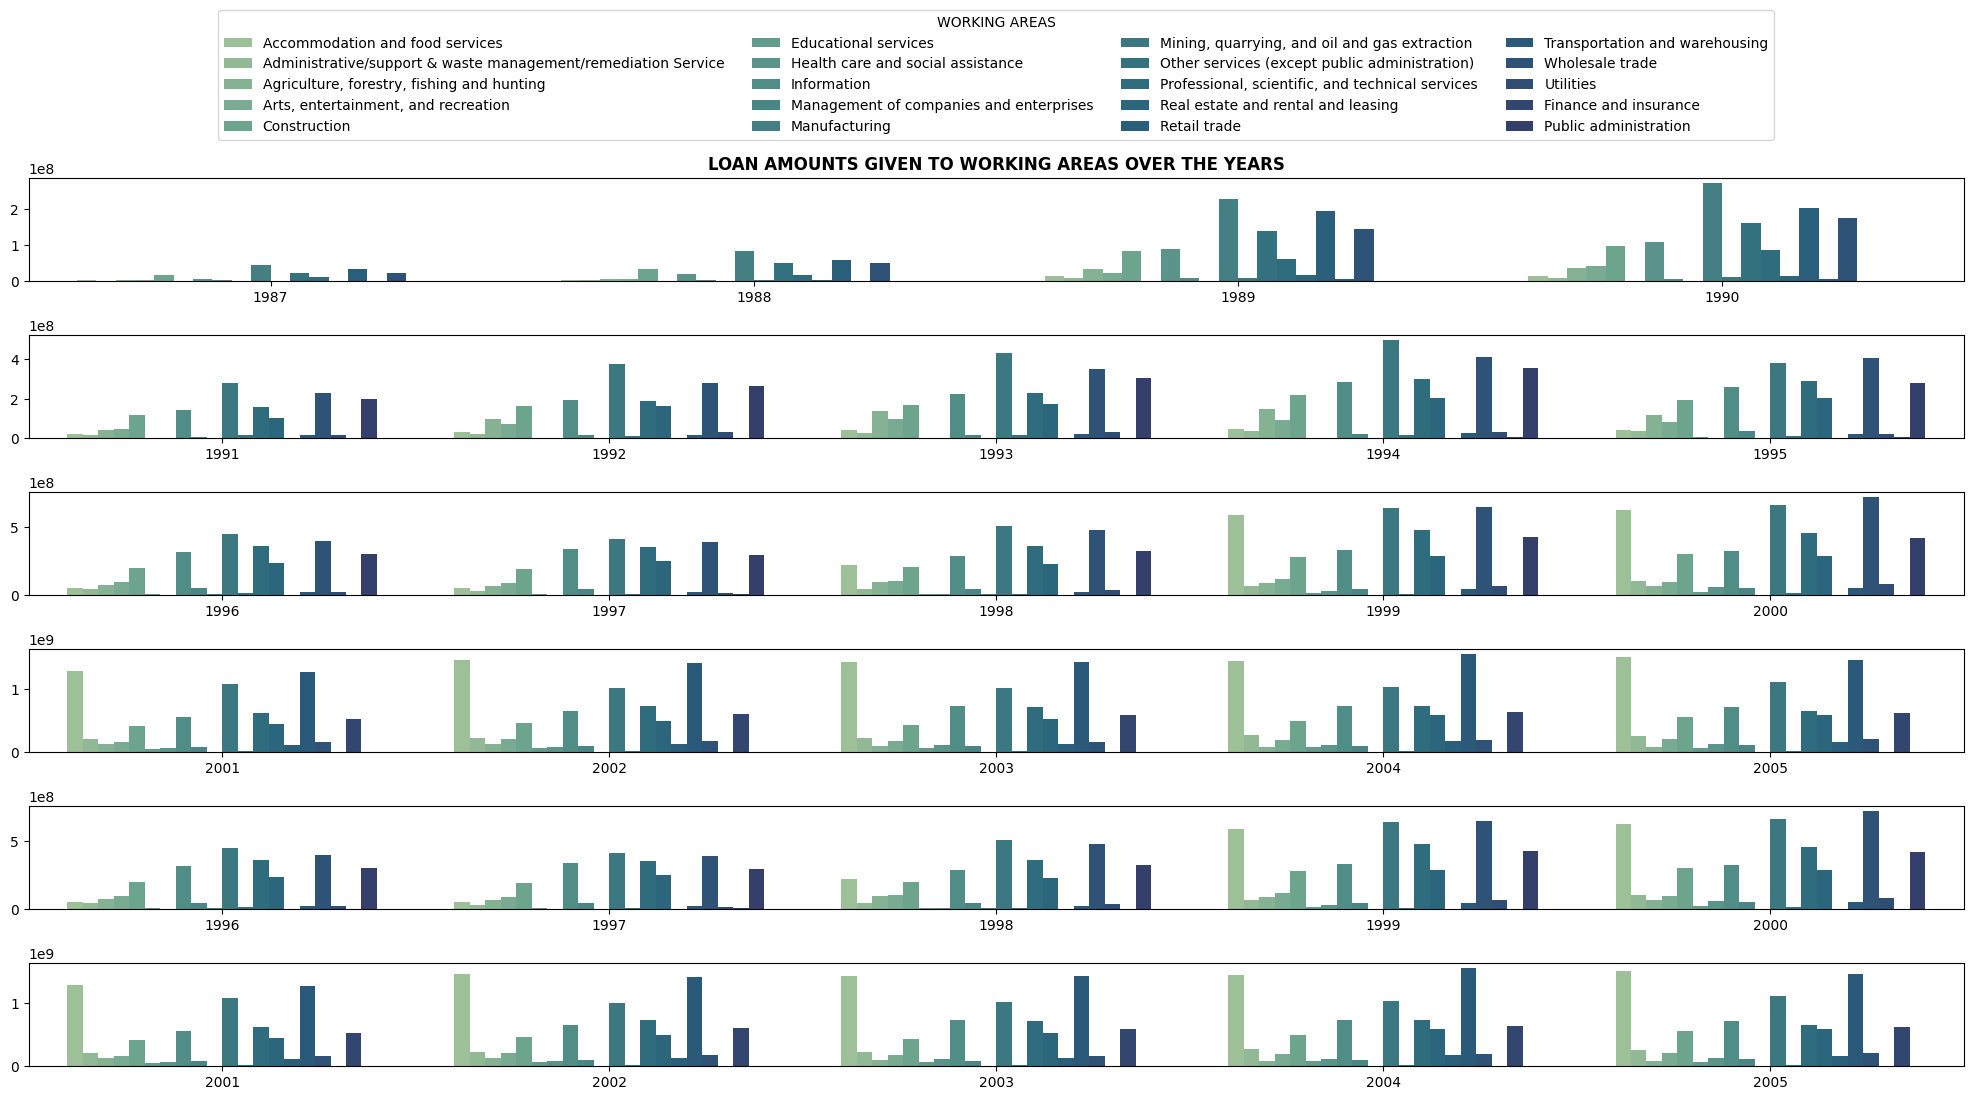

In [165]:
datatest = dataframe.copy()
datatest = datatest.groupby(["ApprovalYear", "Description"])["SBA_Appv"].sum().reset_index()
datatest = datatest.rename(columns={"Description" : "WORKING AREAS"})

fig, axes = plt.subplots(6, 1, figsize=(20,11.5))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Filtrer les données pour les années et les descriptions pertinentes
years_to_plot_1 = range(1987, 1991)
years_to_plot_2 = range(1991, 1996)
years_to_plot_3 = range(1996, 2001)
years_to_plot_4 = range(2001, 2006)
years_to_plot_5 = range(2006, 2011)
years_to_plot_6 = range(2011, 2020)

filtered_data_1 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_1)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_2 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_2)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_3 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_3)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_4 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_4)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_5 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_5)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_6 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_6)) & (datatest['WORKING AREAS'] != "Unknown")]


# Premier graphique
sns.barplot(data=filtered_data_1, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest',  ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS", fontweight='bold')

# # Création d'une légende distincte pour le premier barplot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='WORKING AREAS', bbox_to_anchor=(0.5, 2.7), loc='upper center', ncol=4) #0.5 et 2.2 si pas de tight_layout

# Deuxième graphique
sns.barplot(data=filtered_data_2, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest', legend=False, ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Troisième graphique
sns.barplot(data=filtered_data_3, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest', legend=False, ax=axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("")

# Quatrième graphique
sns.barplot(data=filtered_data_4, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest', legend=False, ax=axes[3])
axes[3].set_xlabel("")
axes[3].set_ylabel("")

# Cinquième graphique
sns.barplot(data=filtered_data_3, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest', legend=False, ax=axes[4])
axes[4].set_xlabel("")
axes[4].set_ylabel("")

# Sixième graphique
sns.barplot(data=filtered_data_4, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette='crest', legend=False, ax=axes[5])
axes[5].set_xlabel("")
axes[5].set_ylabel("")

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

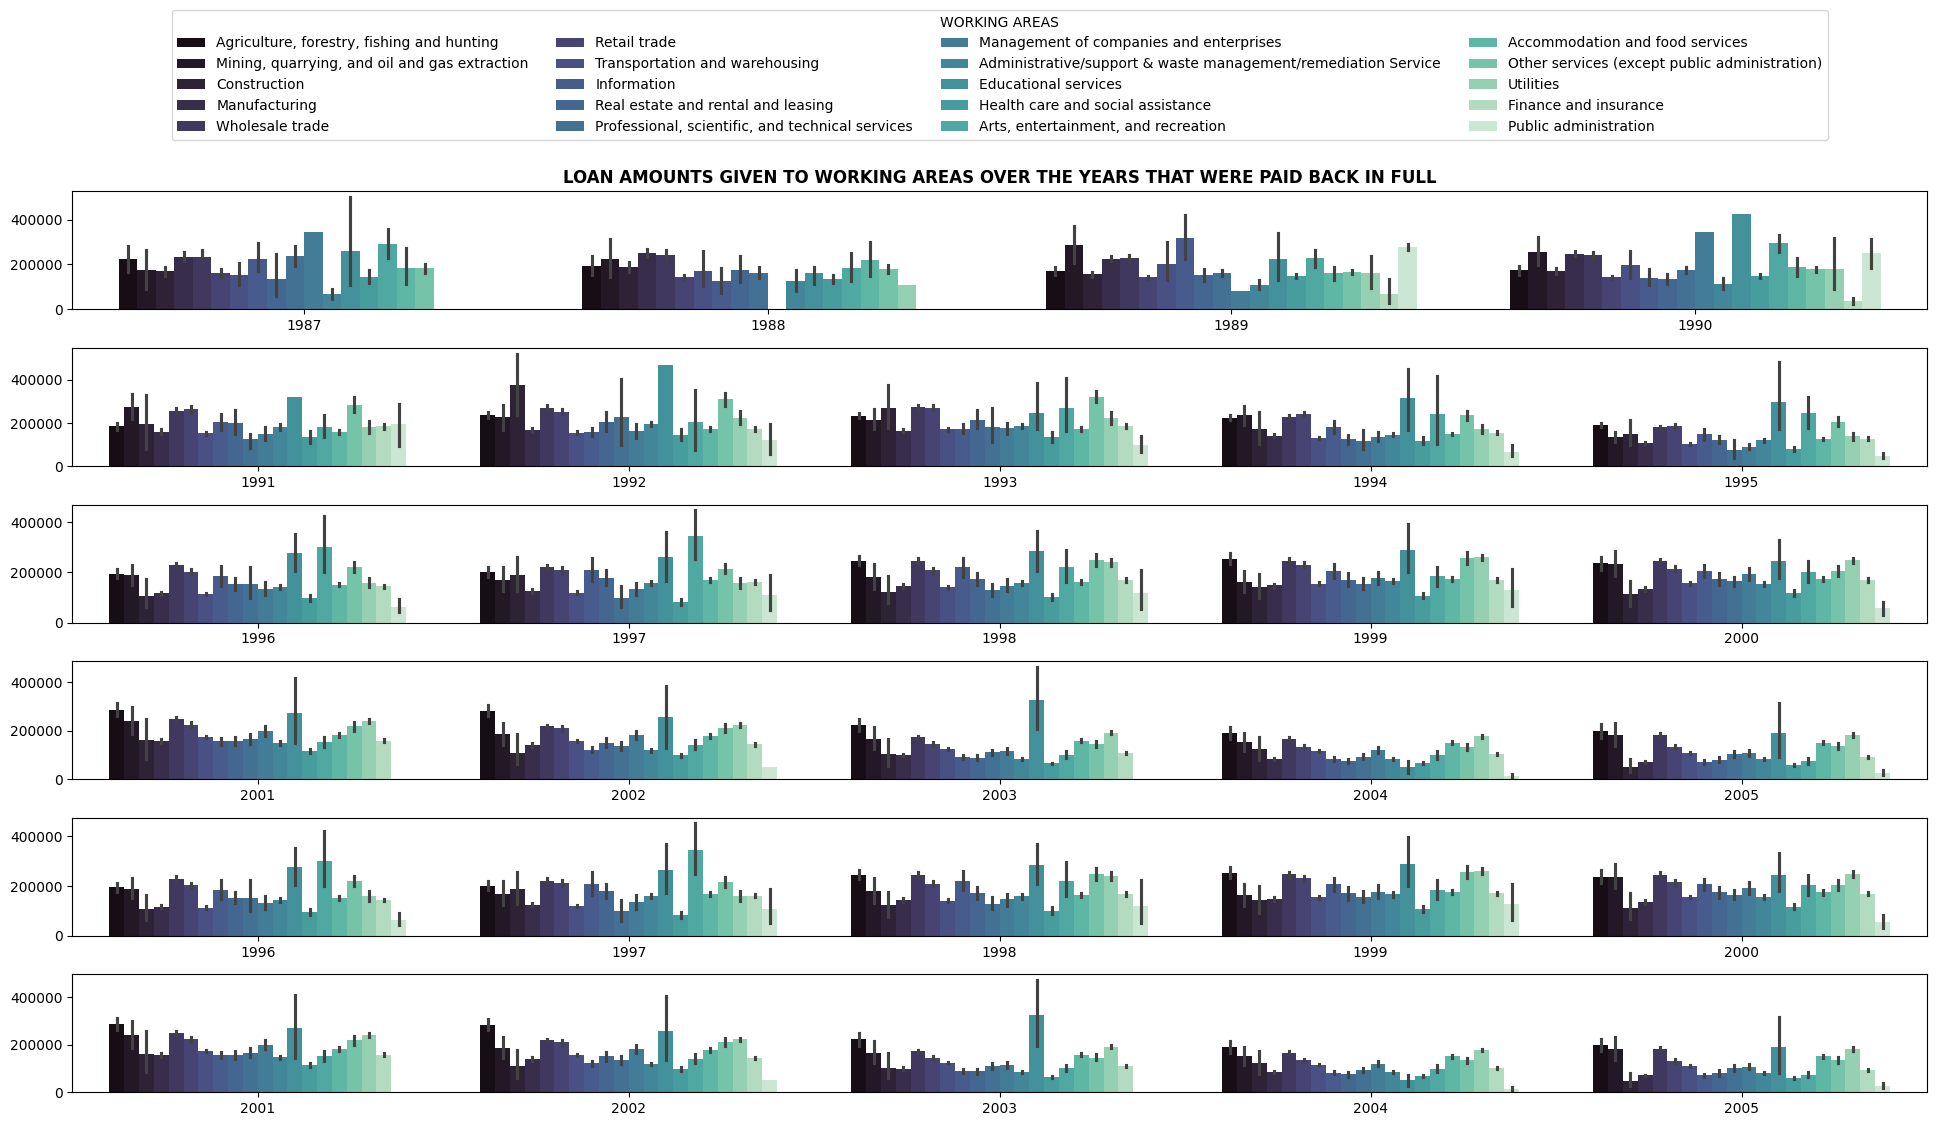

In [166]:
datatest = dataframe.copy()
datatest = datatest.rename(columns={"Description" : "WORKING AREAS"})
datapif = datatest.query("MIS_Status == 'PIF'")
datachgoff = datatest.query("MIS_Status == 'CHGOFF'")
datachgoff

fig, axes = plt.subplots(6, 1, figsize=(20,11.5))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Filtrer les données pour les années et les descriptions pertinentes
years_to_plot_1 = range(1987, 1991)
years_to_plot_2 = range(1991, 1996)
years_to_plot_3 = range(1996, 2001)
years_to_plot_4 = range(2001, 2006)
years_to_plot_5 = range(2006, 2011)
years_to_plot_6 = range(2011, 2020)

filtered_data_1 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_1)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_2 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_2)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_3 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_3)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_4 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_4)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_5 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_5)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_6 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_6)) & (datatest['WORKING AREAS'] != "Unknown")]

# Premier graphique
sns.barplot(data=filtered_data_1, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS THAT WERE PAID BACK IN FULL", fontweight='bold')

# # Création d'une légende distincte pour le premier barplot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='WORKING AREAS', bbox_to_anchor=(0.5, 2.6), loc='upper center', ncol=4) #0.5 et 2.2 si pas de tight_layout

# Deuxième graphique
sns.barplot(data=filtered_data_2, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", legend=False, ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Troisième graphique
sns.barplot(data=filtered_data_3, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", legend=False, ax=axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("")

# Quatrième graphique
sns.barplot(data=filtered_data_4, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", legend=False, ax=axes[3])
axes[3].set_xlabel("")
axes[3].set_ylabel("")

# Cinquième graphique
sns.barplot(data=filtered_data_3, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", legend=False, ax=axes[4])
axes[4].set_xlabel("")
axes[4].set_ylabel("")

# Sixième graphique
sns.barplot(data=filtered_data_4, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="mako", legend=False, ax=axes[5])
axes[5].set_xlabel("")
axes[5].set_ylabel("")

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

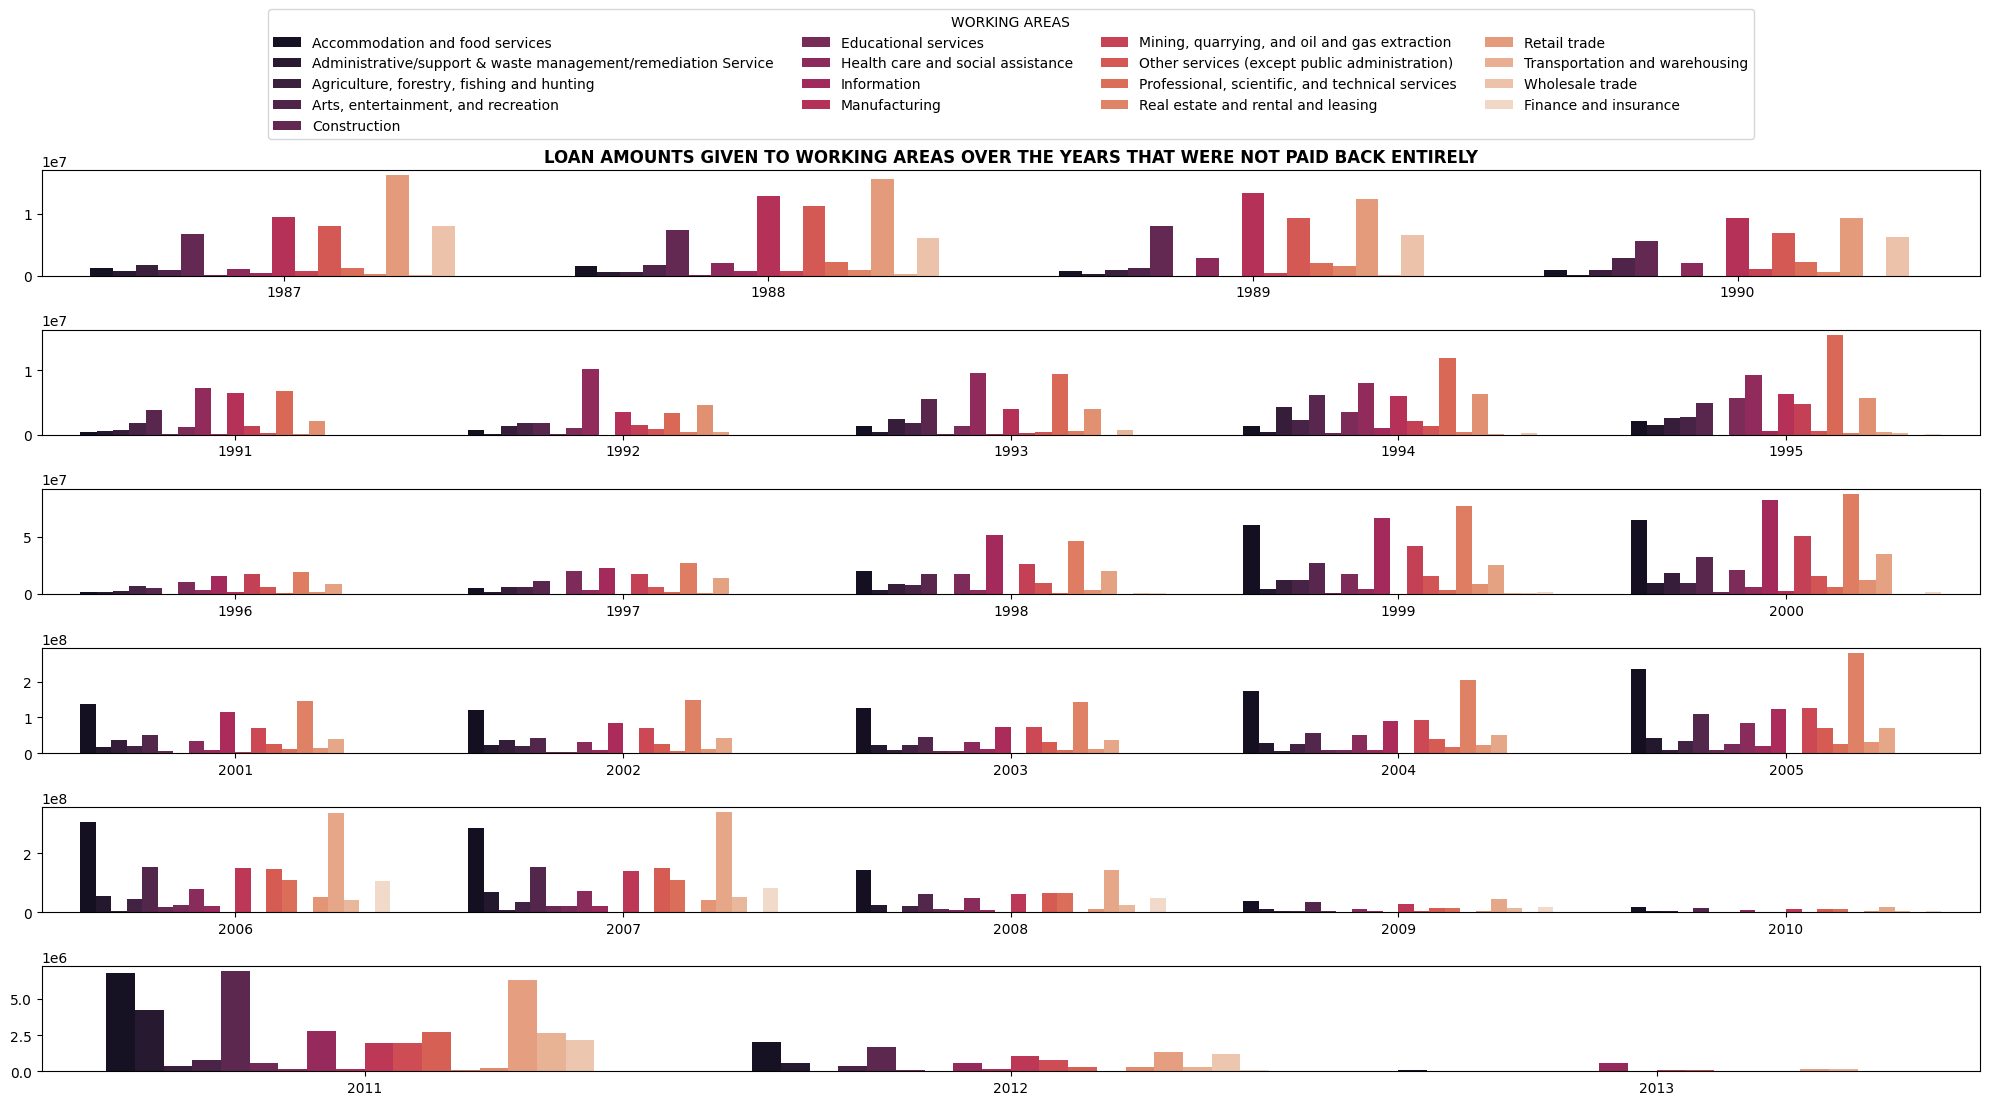

In [167]:
datatest = dataframe.copy()
datatest = datatest.rename(columns={"Description" : "WORKING AREAS"})
datapif = datatest.query("MIS_Status == 'PIF'")
datachgoff = datatest.query("MIS_Status == 'CHGOFF'")
datachgoff

datatest = datachgoff.groupby(["ApprovalYear", "WORKING AREAS"])["SBA_Appv"].sum().reset_index()

fig, axes = plt.subplots(6, 1, figsize=(20,11.5))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Filtrer les données pour les années et les descriptions pertinentes
years_to_plot_1 = range(1987, 1991)
years_to_plot_2 = range(1991, 1996)
years_to_plot_3 = range(1996, 2001)
years_to_plot_4 = range(2001, 2006)
years_to_plot_5 = range(2006, 2011)
years_to_plot_6 = range(2011, 2020)

filtered_data_1 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_1)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_2 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_2)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_3 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_3)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_4 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_4)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_5 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_5)) & (datatest['WORKING AREAS'] != "Unknown")]
filtered_data_6 = datatest[(datatest['ApprovalYear'].isin(years_to_plot_6)) & (datatest['WORKING AREAS'] != "Unknown")]

# Premier graphique
sns.barplot(data=filtered_data_1, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket", ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS THAT WERE NOT PAID BACK ENTIRELY", fontweight='bold')

# # Création d'une légende distincte pour le premier barplot
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='WORKING AREAS', bbox_to_anchor=(0.5, 2.6), loc='upper center', ncol=4) #0.5 et 2.2 si pas de tight_layout

# Deuxième graphique
sns.barplot(data=filtered_data_2, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket", legend=False, ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Troisième graphique
sns.barplot(data=filtered_data_3, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket",  legend=False, ax=axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("")

# Quatrième graphique
sns.barplot(data=filtered_data_4, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket", legend=False, ax=axes[3])
axes[3].set_xlabel("")
axes[3].set_ylabel("")

# Cinquième graphique
sns.barplot(data=filtered_data_5, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket", legend=False, ax=axes[4])
axes[4].set_xlabel("")
axes[4].set_ylabel("")

# Sixième graphique
sns.barplot(data=filtered_data_6, x='ApprovalYear', y='SBA_Appv', hue='WORKING AREAS', palette="rocket", legend=False, ax=axes[5])
axes[5].set_xlabel("")
axes[5].set_ylabel("")

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

In [168]:
datatest = dataframe.copy()
# datatest.MIS_Status.value_counts()

def change_values_target(data):
    if data == "PIF":
        return 1
    else:
        return 0

datatest.MIS_Status = datatest.MIS_Status.apply(change_values_target)
datatest.MIS_Status.value_counts()

MIS_Status
1    739609
0    157558
Name: count, dtype: int64

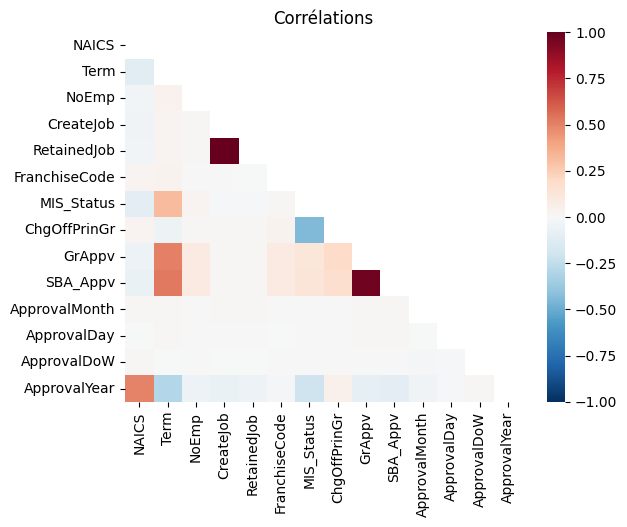

In [169]:
datacorr = datatest.drop(['NAICS_id', 'ApprovalFY'], axis=1)
corr = datacorr.select_dtypes(include='number').corr()

mask = np.zeros_like(corr)
# Set the upper triangle of the mask to True
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap="RdBu_r", vmax=1, center=0, vmin=-1)
plt.title("Corrélations")
plt.show()

In [170]:
# importances = model1[-1].feature_importances_
# indices = np.argsort(importances)[::-1]
# feat_labels = X_train.columns
# tups = [(feat_labels[i], importances[i]) for i in indices]
# pd.DataFrame(tups, columns=["feature", "importance"])

In [171]:
datatest.sample()

Name State          Bank BankState   NAICS  \
227385  AXIOM CONTRACTORS, INC    FL  SYNOVUS BANK        FL  235610   

        ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
227385        1998    60      8      True          0            0   

        FranchiseCode UrbanRural RevLineCr LowDoc  MIS_Status  ChgOffPrinGr  \
227385              0          M   UNKNOWN      Y           1          0.00   

         GrAppv  SBA_Appv  ApprovalMonth  ApprovalDay  ApprovalDoW  \
227385 50000.00  40000.00              6           16            1   

        ApprovalYear  Recession  NAICS_id   Description  SameState  
227385          1998      False        23  Construction       True

In [172]:
datascat = datatest.copy()
datascatnaics = datascat.query("NAICS_id != 0")
datascatnaics.NAICS_id = datascatnaics.NAICS_id.astype(int)

C:\Users\Thibaut\AppData\Local\Temp\ipykernel_28340\2585709723.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
# CREATION D'UNE NOUVELLE COLONNE REGION ?
regions = {
    "AL": "Southeast",
    "AK": "Northwest",
    "AZ": "Southwest",
    "AR": "Southeast",
    "CA": "Southwest",
    "CO": "Southwest",
    "CT": "Northeast",
    "DE": "Northeast",
    "FL": "Southeast",
    "GA": "Southeast",
    "HI": "Northwest",
    "ID": "Northwest",
    "IL": "Northeast",
    "IN": "Northeast",
    "IA": "Northwest",
    "KS": "Northwest",
    "KY": "Southeast",
    "LA": "Southeast",
    "ME": "Northeast",
    "MD": "Northeast",
    "MA": "Northeast",
    "MI": "Northeast",
    "MN": "Northwest",
    "MS": "Southeast",
    "MO": "Northwest",
    "MT": "Northwest",
    "NE": "Northwest",
    "NV": "Northwest",
    "NH": "Northeast",
    "NJ": "Northeast",
    "NM": "Southwest",
    "NY": "Northeast",
    "NC": "Southeast",
    "ND": "Northwest",
    "OH": "Northeast",
    "OK": "Southwest",
    "OR": "Northwest",
    "PA": "Northeast",
    "RI": "Northeast",
    "SC": "Southeast",
    "SD": "Northwest",
    "TN": "Southeast",
    "TX": "Southwest",
    "UT": "Northwest",
    "VT": "Northeast",
    "VA": "Southeast",
    "WA": "Northwest",
    "WV": "Southeast",
    "WI": "Northwest",
    "WY": "Northwest"
}

dataregions = dataframe.copy()
dataregions["Region"] = dataregions["State"].map(regions)
dataregions.Region.value_counts()

Region
Northeast    297881
Southwest    255082
Northwest    193690
Southeast    148888
Name: count, dtype: int64

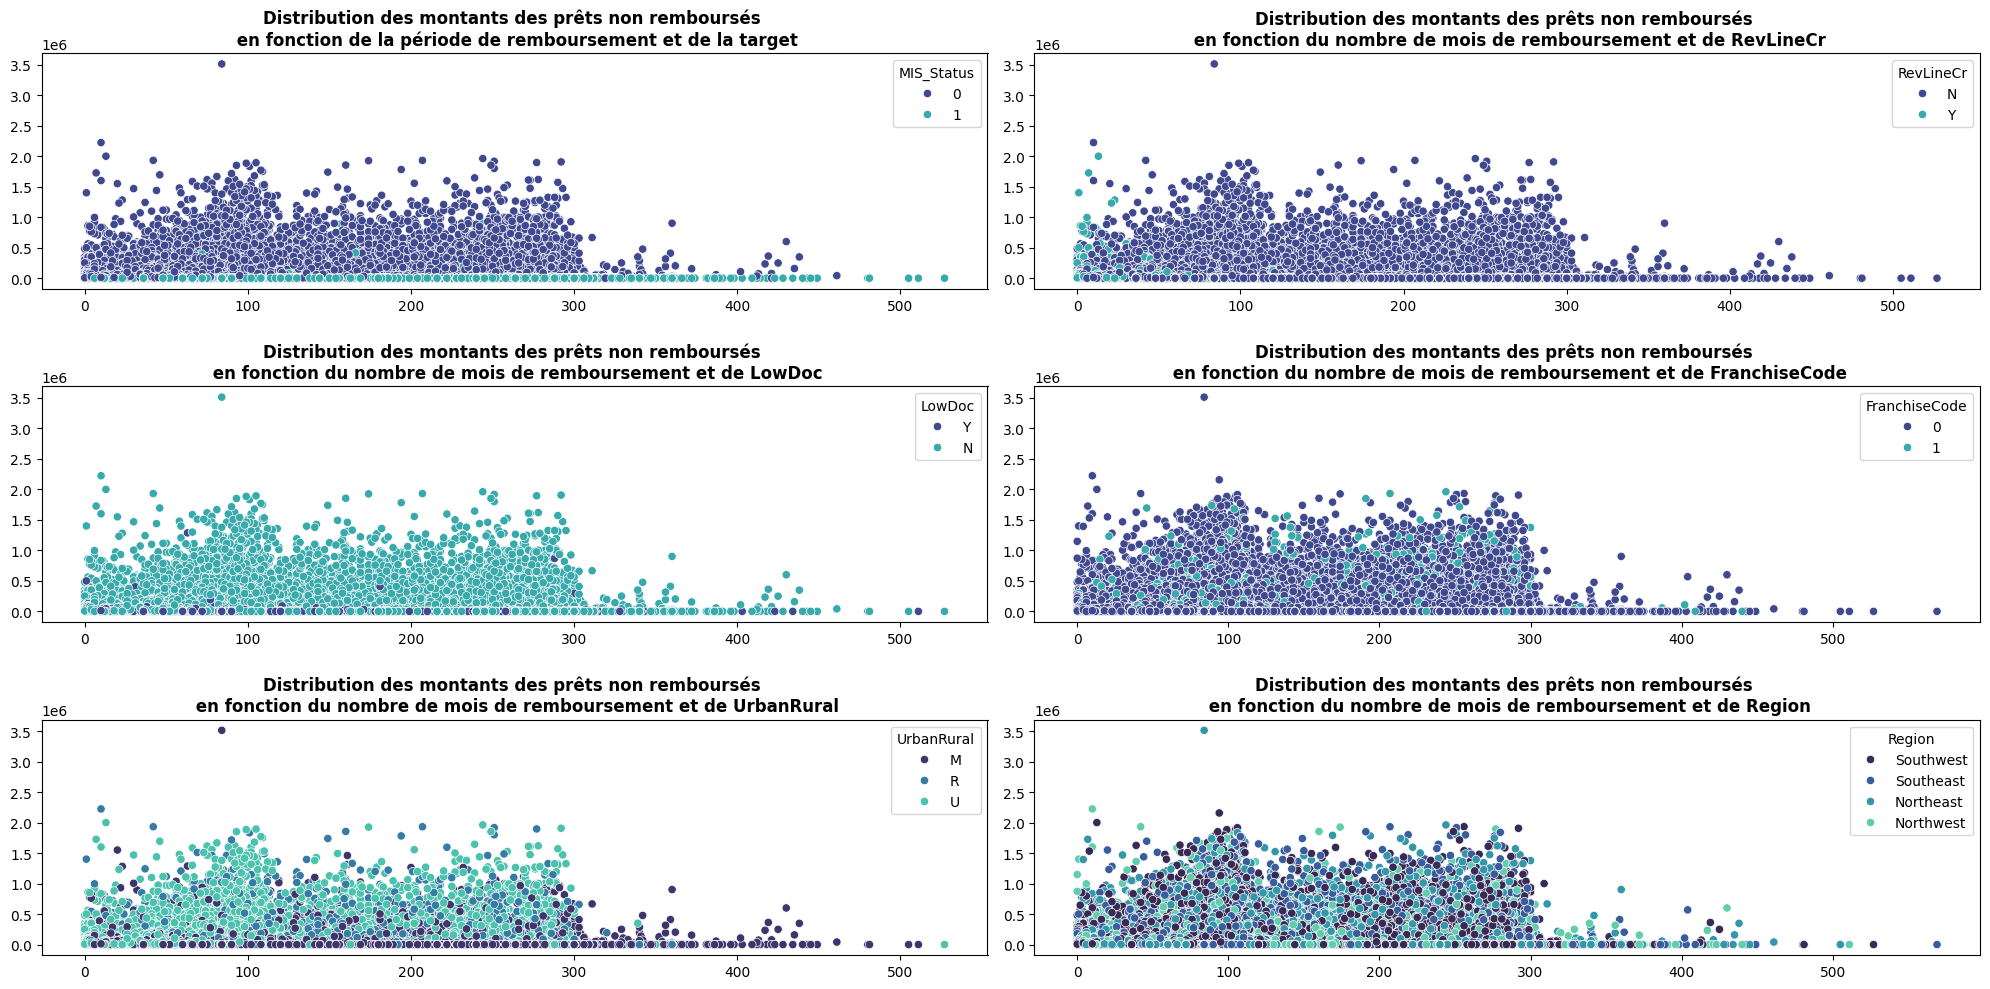

In [180]:
fig, axes = plt.subplots(3,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.scatterplot(data=datatest, x="Term", y="ChgOffPrinGr", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts non remboursés \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.scatterplot(data=datatest, x="Term", y="ChgOffPrinGr", hue="RevLineCr", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.scatterplot(datatest, x="Term", y="ChgOffPrinGr", hue="LowDoc", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.scatterplot(dataset, x="Term", y="ChgOffPrinGr", hue="FranchiseCode", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Cinquième graphique
sns.scatterplot(datatest, x="Term", y="ChgOffPrinGr", hue="UrbanRural", palette="mako", ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de UrbanRural", fontweight='bold')

# Sixième graphique
sns.scatterplot(dataregions, x="Term", y="ChgOffPrinGr", hue="Region", palette="mako", ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("")
axes[2,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de Region", fontweight='bold')

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

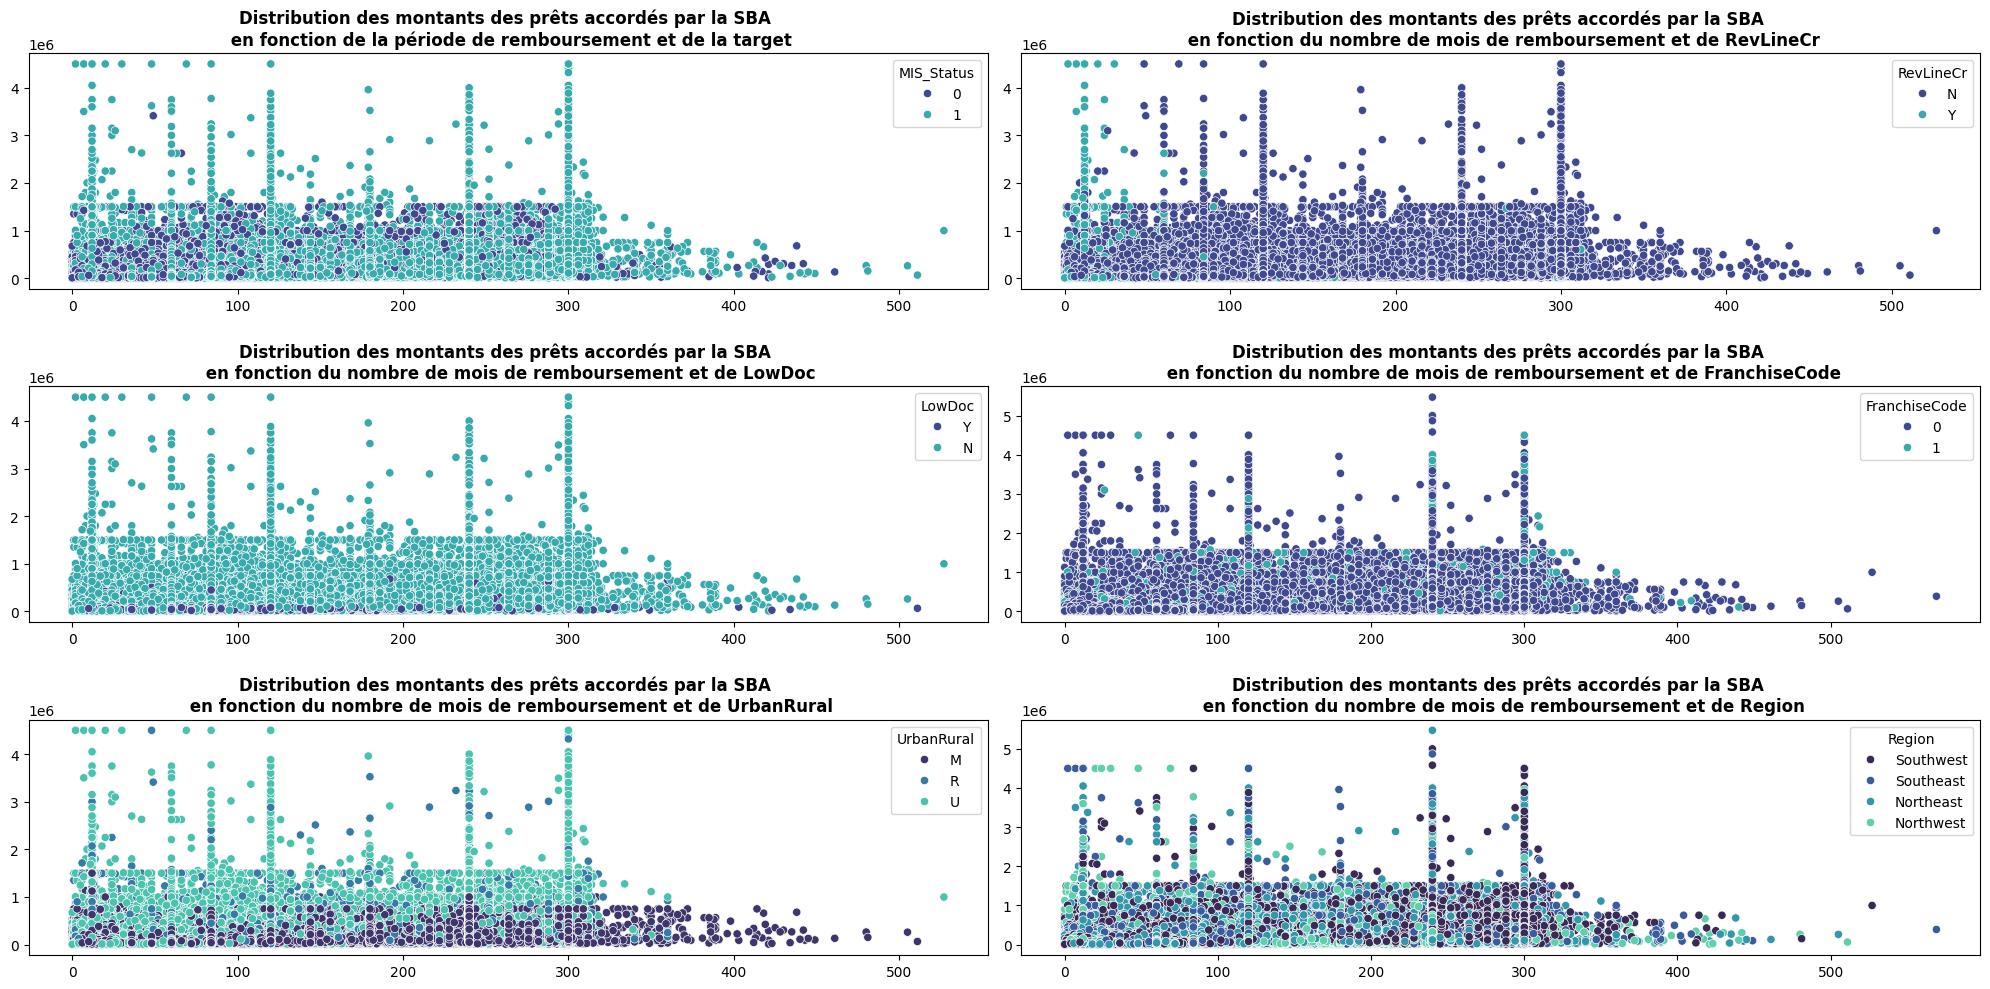

In [181]:
fig, axes = plt.subplots(3,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.scatterplot(data=datatest, x="Term", y="SBA_Appv", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.scatterplot(data=datatest, x="Term", y="SBA_Appv", hue="RevLineCr", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.scatterplot(datatest, x="Term", y="SBA_Appv", hue="LowDoc", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.scatterplot(dataset, x="Term", y="SBA_Appv", hue="FranchiseCode", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Cinquième graphique
sns.scatterplot(datatest, x="Term", y="SBA_Appv", hue="UrbanRural", palette="mako", ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction du nombre de mois de remboursement et de UrbanRural", fontweight='bold')

# Sixième graphique
sns.scatterplot(dataregions, x="Term", y="SBA_Appv", hue="Region", palette="mako", ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("")
axes[2,1].set_title("Distribution des montants des prêts accordés par la SBA \n en fonction du nombre de mois de remboursement et de Region", fontweight='bold')

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

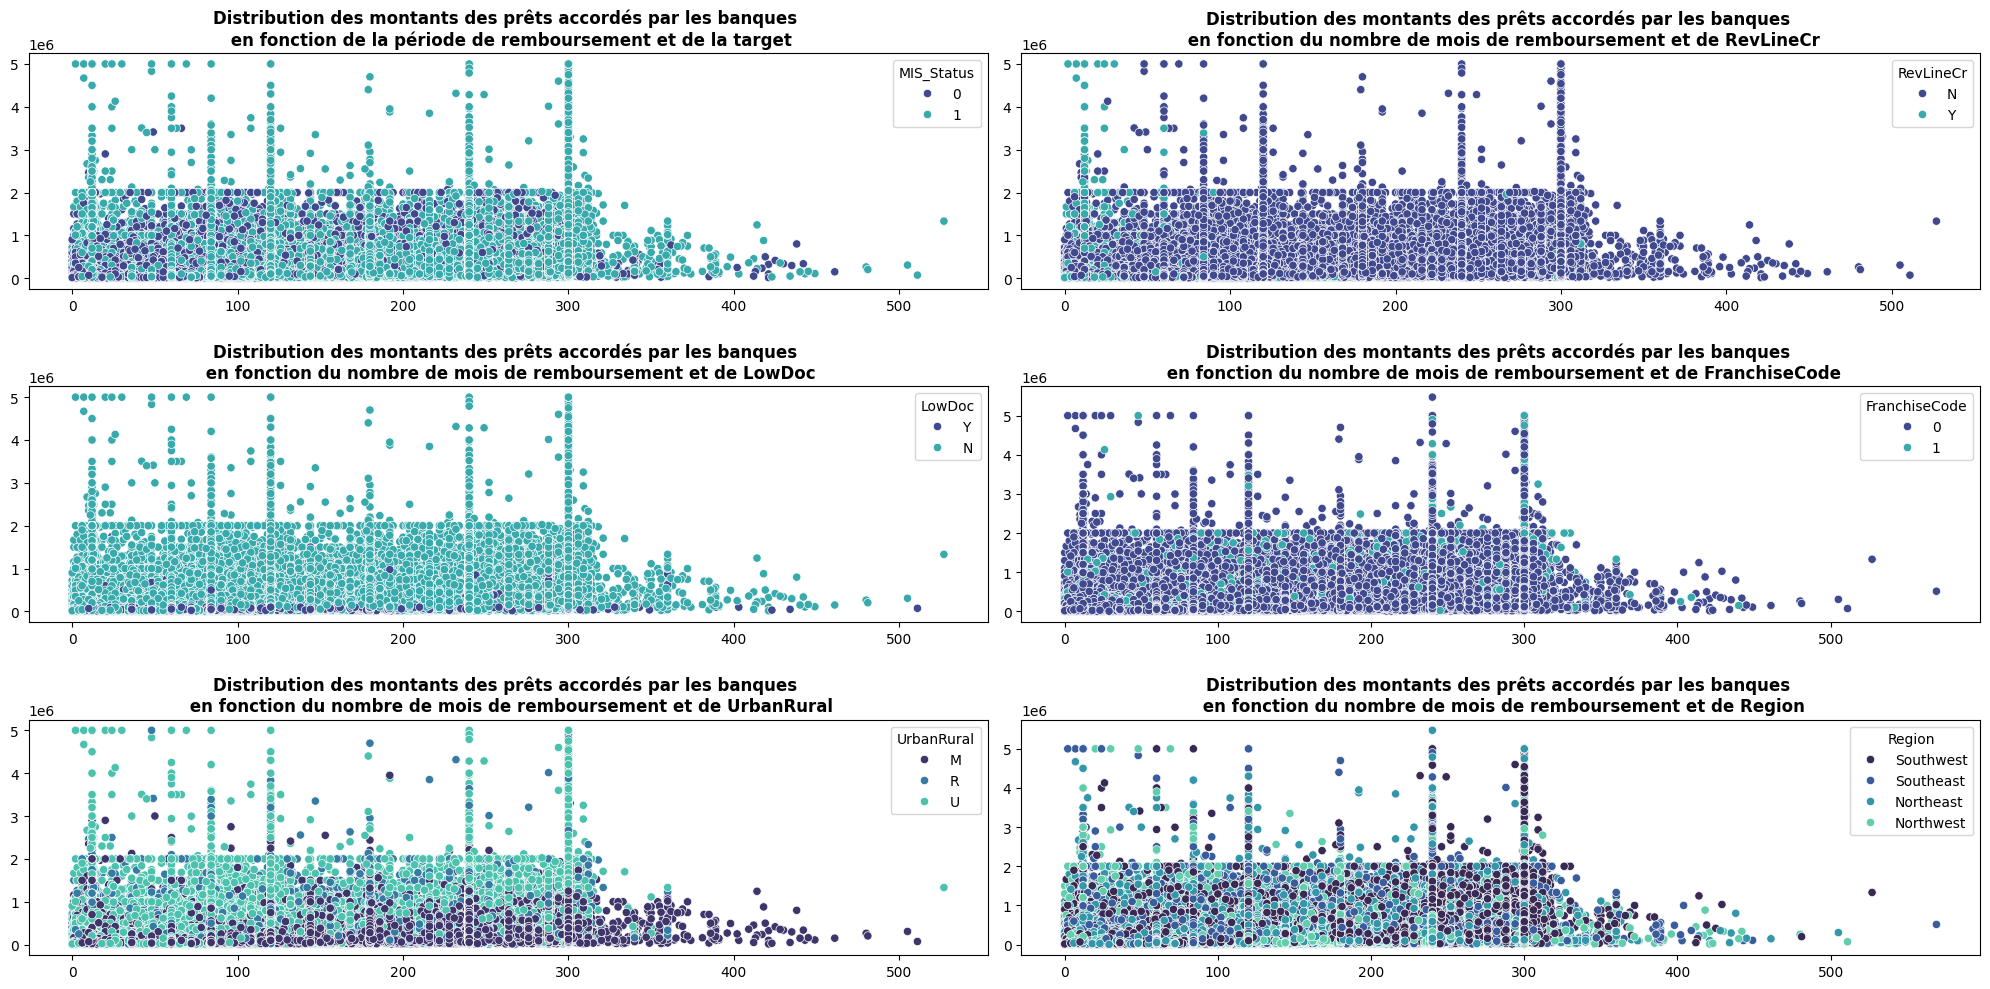

In [182]:
fig, axes = plt.subplots(3,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.scatterplot(data=datatest, x="Term", y="GrAppv", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts accordés par les banques \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.scatterplot(data=datatest, x="Term", y="GrAppv", hue="RevLineCr", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts accordés par les banques \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.scatterplot(datatest, x="Term", y="GrAppv", hue="LowDoc", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts accordés par les banques \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.scatterplot(dataset, x="Term", y="GrAppv", hue="FranchiseCode", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts accordés par les banques \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Cinquième graphique
sns.scatterplot(datatest, x="Term", y="GrAppv", hue="UrbanRural", palette="mako", ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution des montants des prêts accordés par les banques \n en fonction du nombre de mois de remboursement et de UrbanRural", fontweight='bold')

# Sixième graphique
sns.scatterplot(dataregions, x="Term", y="GrAppv", hue="Region", palette="mako", ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("")
axes[2,1].set_title("Distribution des montants des prêts accordés par les banques \n en fonction du nombre de mois de remboursement et de Region", fontweight='bold')

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

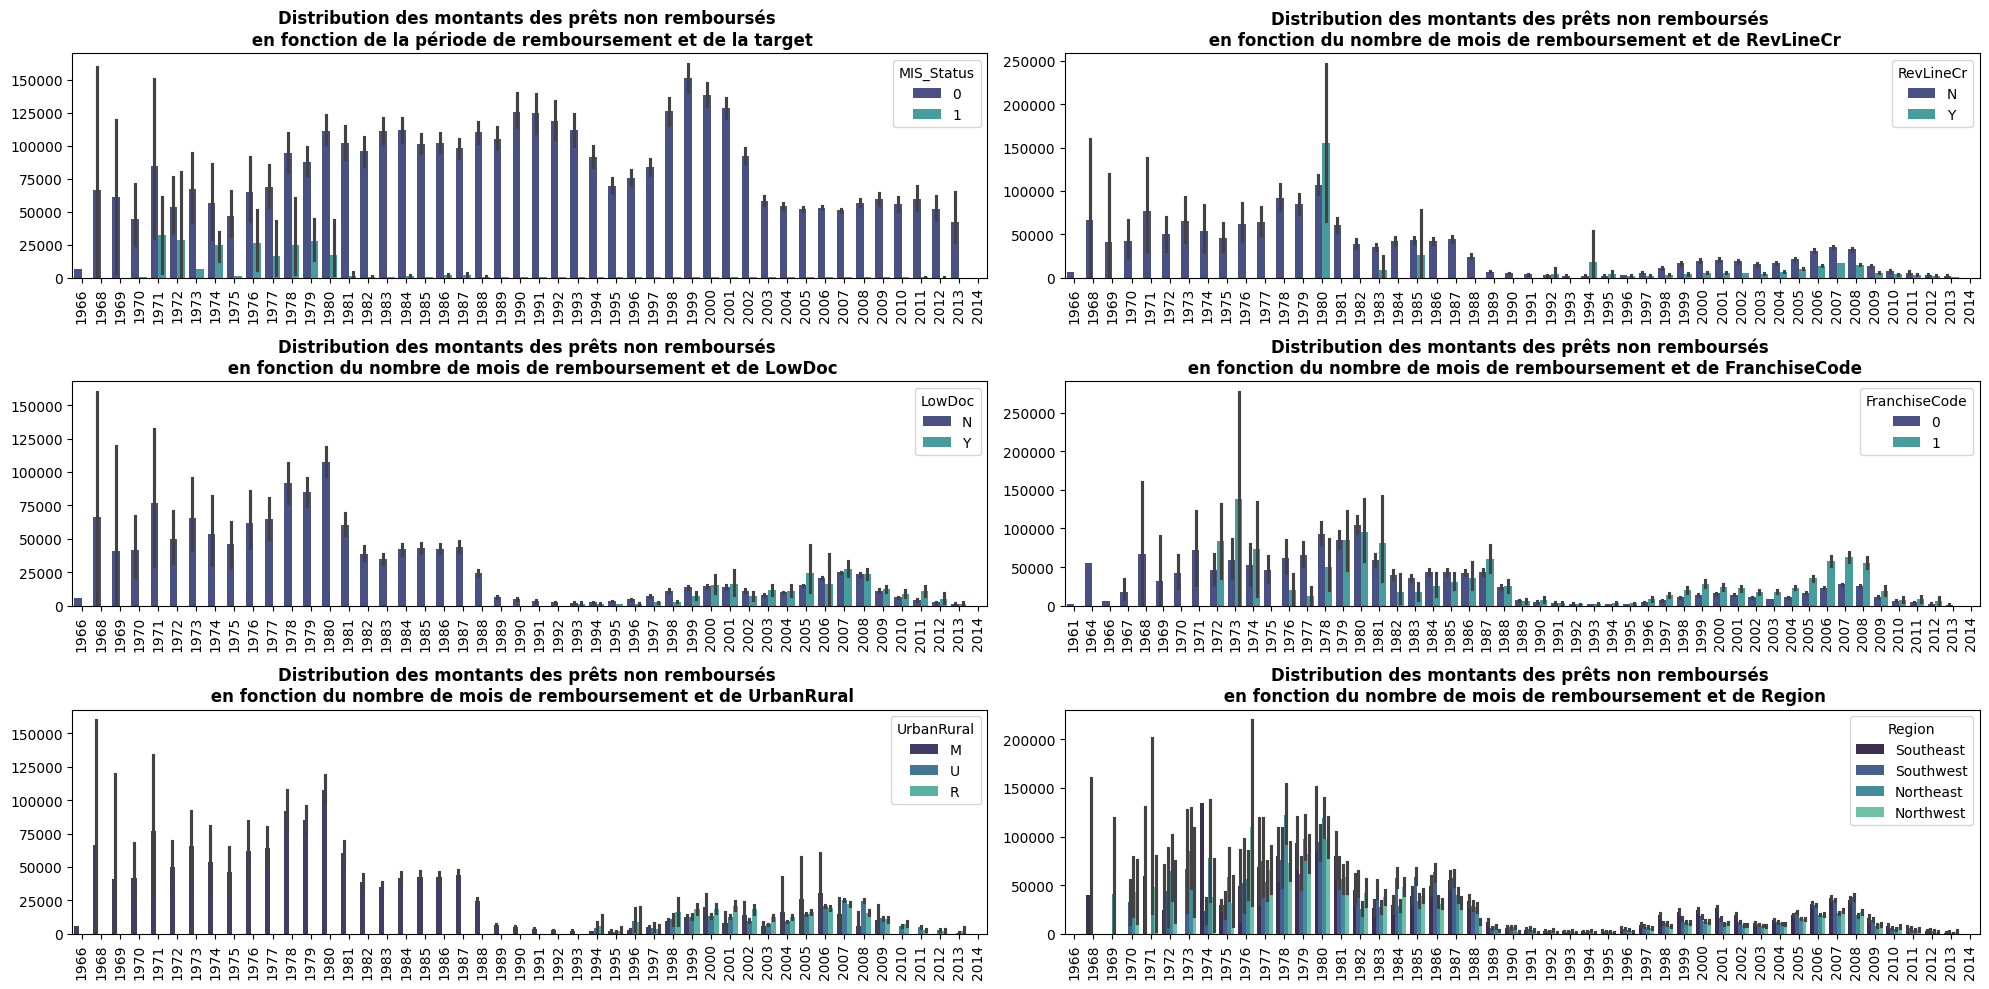

In [195]:
fig, axes = plt.subplots(3,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.barplot(data=datatest, x="ApprovalYear", y="ChgOffPrinGr", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts non remboursés \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.barplot(data=datatest, x="ApprovalYear", y="ChgOffPrinGr", hue="RevLineCr", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.barplot(datatest, x="ApprovalYear", y="ChgOffPrinGr", hue="LowDoc", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.barplot(dataset, x="ApprovalYear", y="ChgOffPrinGr", hue="FranchiseCode", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Cinquième graphique
sns.barplot(datatest, x="ApprovalYear", y="ChgOffPrinGr", hue="UrbanRural", palette="mako", ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de UrbanRural", fontweight='bold')

# Sixième graphique
sns.barplot(dataregions, x="ApprovalYear", y="ChgOffPrinGr", hue="Region", palette="mako", ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("")
axes[2,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de Region", fontweight='bold')

# Boucle sur chaque axe dans les sous-graphiques
for ax in axes.flatten():
    # Appliquer la rotation verticale aux graduations de l'axe des x
    ax.tick_params(axis='x', rotation=90)
# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

In [197]:
# Valeurs bizarres dans le premier graph
# On dirait que certains prêts PIF ont quand même eu un "montant non remboursé" dans les années 70
# Supprimer ces valeurs améliorait la précision du Recall?

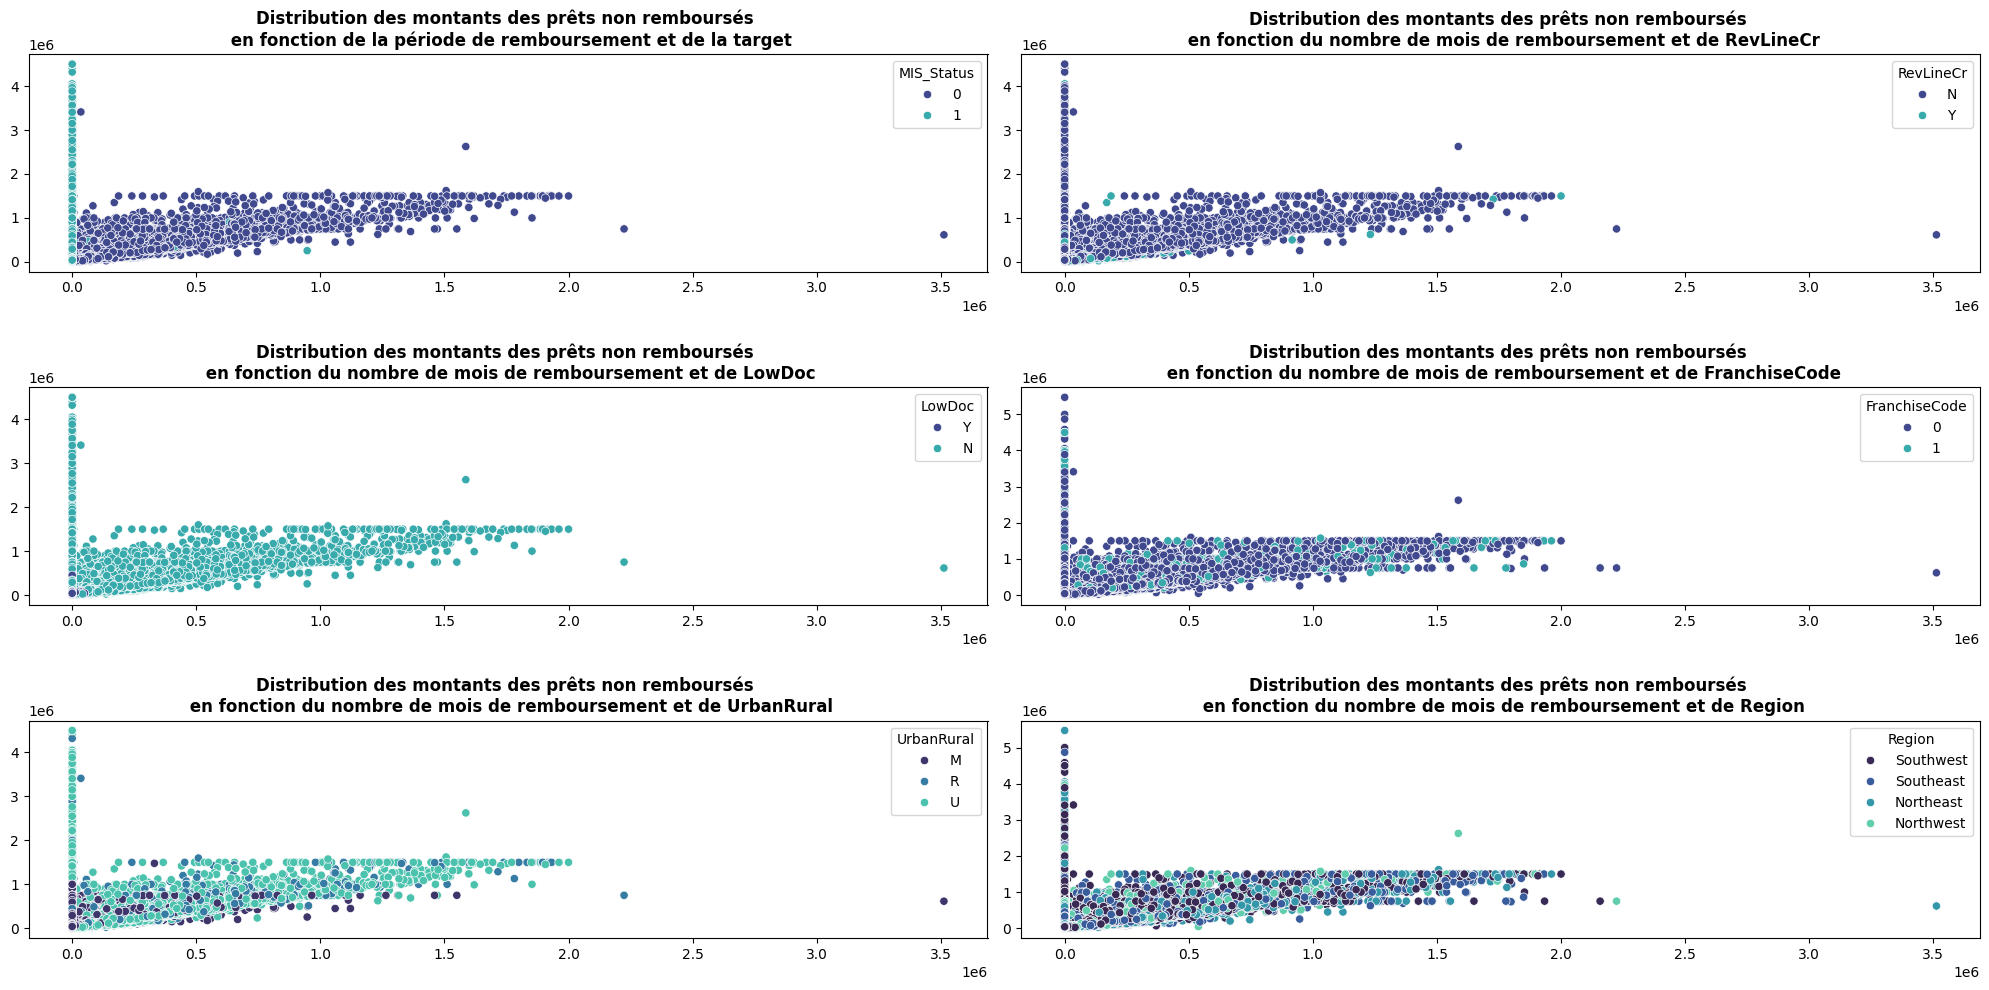

In [184]:
fig, axes = plt.subplots(3,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.scatterplot(data=datatest, x="ChgOffPrinGr", y="SBA_Appv", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts non remboursés \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.scatterplot(data=datatest, x="ChgOffPrinGr", y="SBA_Appv", hue="RevLineCr", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.scatterplot(datatest, x="ChgOffPrinGr", y="SBA_Appv", hue="LowDoc", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.scatterplot(dataset, x="ChgOffPrinGr", y="SBA_Appv", hue="FranchiseCode", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Cinquième graphique
sns.scatterplot(datatest, x="ChgOffPrinGr", y="SBA_Appv", hue="UrbanRural", palette="mako", ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel("")
axes[2,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de UrbanRural", fontweight='bold')

# Sixième graphique
sns.scatterplot(dataregions, x="ChgOffPrinGr", y="SBA_Appv", hue="Region", palette="mako", ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel("")
axes[2,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de Region", fontweight='bold')

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

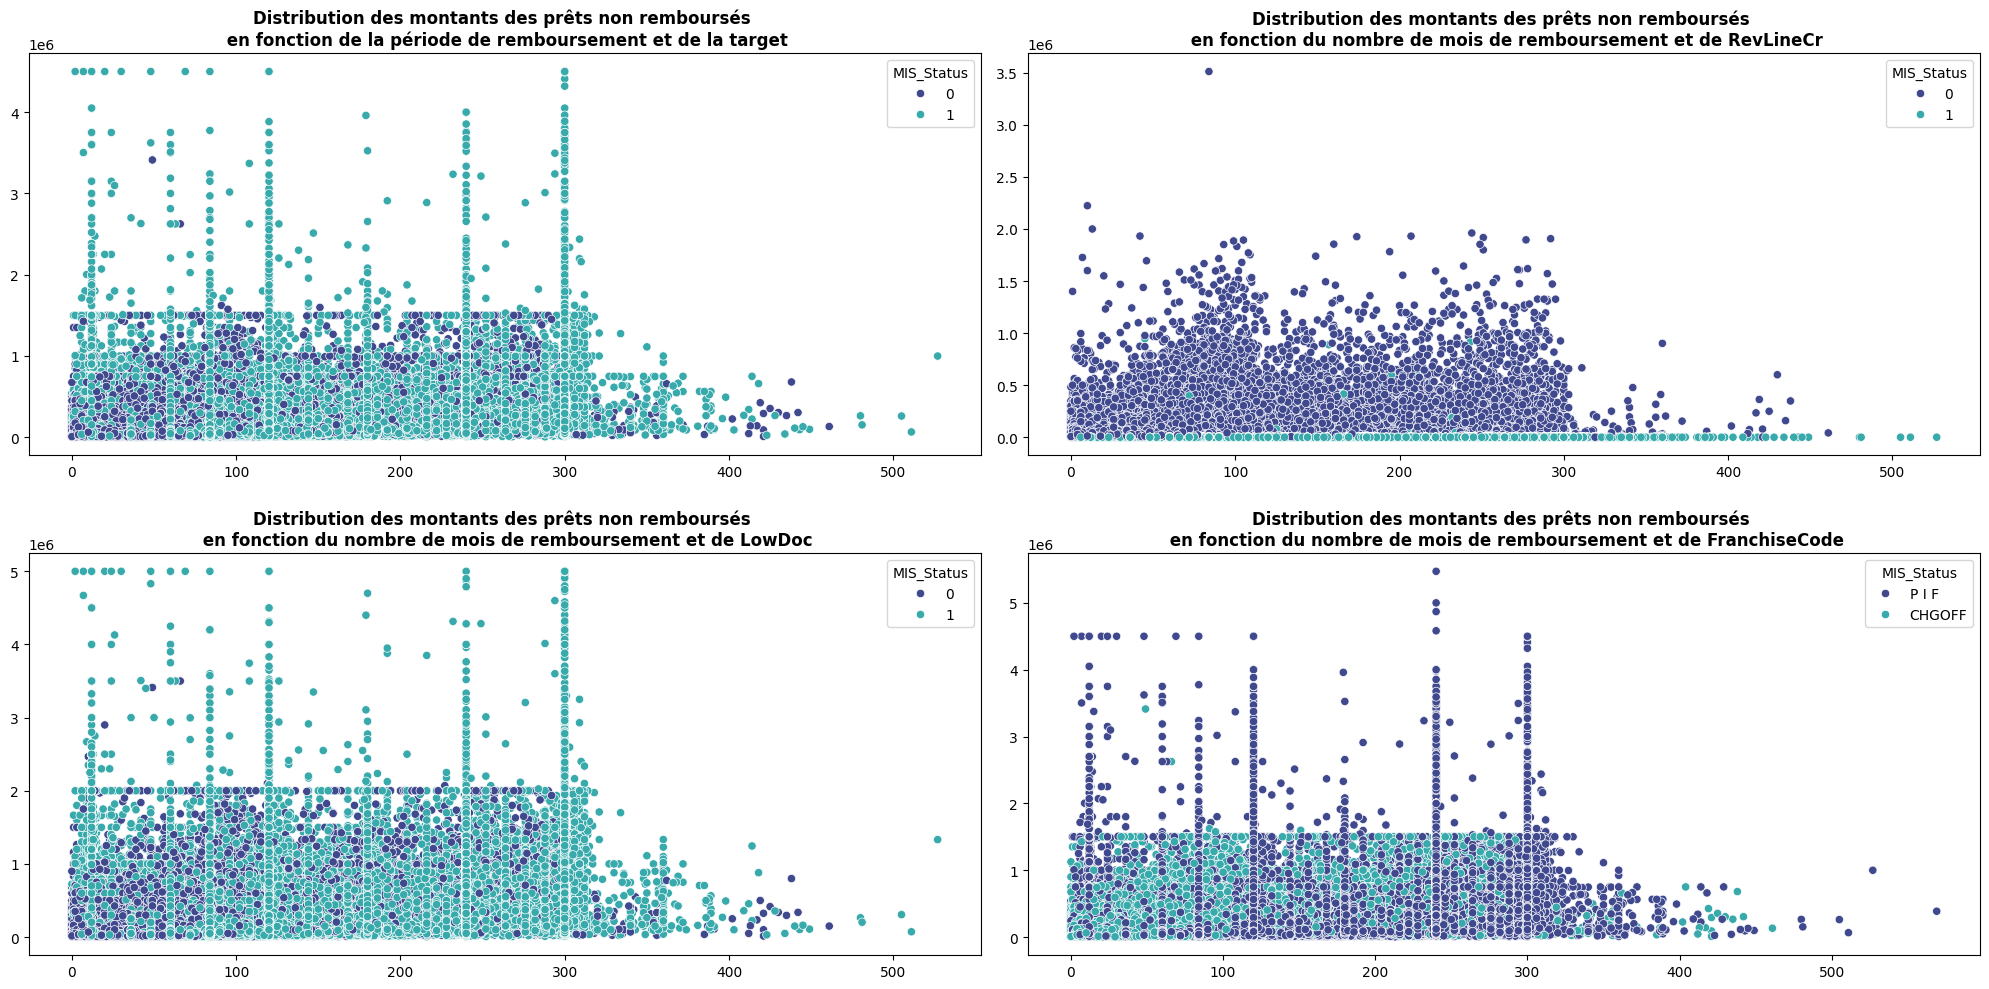

In [185]:
fig, axes = plt.subplots(2,2, figsize=(20,10))  # 1 ligne, 2 colonnes
# fig.suptitle("LOAN AMOUNTS GIVEN TO WORKING AREAS OVER THE YEARS")

# Premier graphique
sns.scatterplot(data=datatest, x="Term", y="SBA_Appv", hue="MIS_Status", palette="mako", ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("")
axes[0,0].set_title("Distribution des montants des prêts non remboursés \n en fonction de la période de remboursement et de la target", fontweight='bold')

# Deuxième graphique
sns.scatterplot(data=datatest, x="Term", y="ChgOffPrinGr", hue="MIS_Status", palette="mako", ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de RevLineCr", fontweight='bold')

# Troisième graphique
sns.scatterplot(datatest, x="Term", y="GrAppv", hue="MIS_Status", palette="mako", ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel("")
axes[1,0].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de LowDoc", fontweight='bold')

# Quatrième graphique
sns.scatterplot(dataset, x="Term", y="SBA_Appv", hue="MIS_Status", palette="mako", ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel("")
axes[1,1].set_title("Distribution des montants des prêts non remboursés \n en fonction du nombre de mois de remboursement et de FranchiseCode", fontweight='bold')

# Réglage de l'espacement entre les subplots
plt.tight_layout()

plt.show()

In [186]:
datatest.FranchiseCode.value_counts()

FranchiseCode
0    593795
1     26117
Name: count, dtype: int64

In [187]:
data.sample()

LoanNr_ChkDgt                         Name    City State    Zip  \
328957     3284135000  METRO OFFICE EQUIPMENT, INC  Smiths    AL  36877   

                 Bank BankState   NAICS  ApprovalFY  Term  NoEmp  NewExist  \
328957  SUNTRUST BANK        GA  423420        2009    60      7      1.00   

        CreateJob  RetainedJob  FranchiseCode  UrbanRural RevLineCr LowDoc  \
328957          3           10              0           1         Y      N   

       MIS_Status  ChgOffPrinGr    GrAppv  SBA_Appv  ApprovalMonth  \
328957      P I F          0.00 100000.00  50000.00             12   

        ApprovalDay  ApprovalDoW  ApprovalYear  Recession  NAICS_id  
328957           12            4          2008       True        42